In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from scipy.stats import zscore


In [2]:
data = pd.read_csv("Walmart.csv")
df = pd.DataFrame(data)
df

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0         1  05-02-2010    1643690.90             0        42.31       2.572   
1         1  12-02-2010    1641957.44             1        38.51       2.548   
2         1  19-02-2010    1611968.17             0        39.93       2.514   
3         1  26-02-2010    1409727.59             0        46.63       2.561   
4         1  05-03-2010    1554806.68             0        46.50       2.625   
...     ...         ...           ...           ...          ...         ...   
6430     45  28-09-2012     713173.95             0        64.88       3.997   
6431     45  05-10-2012     733455.07             0        64.89       3.985   
6432     45  12-10-2012     734464.36             0        54.47       4.000   
6433     45  19-10-2012     718125.53             0        56.47       3.969   
6434     45  26-10-2012     760281.43             0        58.85       3.882   

             CPI  Unemployment  
0     211.096358         8.106  
1     211.242170         8.106  
2     211.289143         8.106  
3     211.319643         8.106  
4     211.350143         8.106  
...          ...           ...  
6430  192.013558         8.684  
6431  192.170412         8.667  
6432  192.327265         8.667  
6433  192.330854         8.667  
6434  192.308899         8.667  

[6435 rows x 8 columns]

In [3]:
date_type = type(df['Date'][0])
store_type = type(df['Store'][0])
weeklySales_type = type(df['Weekly_Sales'][0])
Temp_type = type(df['Temperature'][0])
Fuelprice_type = type(df['Fuel_Price'][0])
cpi_type = type(df['CPI'][0])
unemployement_type = type(df['Unemployment'][0])

print('Date: ',date_type)
print('Store: ',store_type)
print('Weekly Sales: ',weeklySales_type)
print('Temperature: ',Temp_type)
print('Fuel Price: ',Fuelprice_type)
print('CPI: ',cpi_type)
print('Unemployement: ',unemployement_type)

Date:  <class 'str'>
Store:  <class 'numpy.int64'>
Weekly Sales:  <class 'numpy.float64'>
Temperature:  <class 'numpy.float64'>
Fuel Price:  <class 'numpy.float64'>
CPI:  <class 'numpy.float64'>
Unemployement:  <class 'numpy.float64'>


### Finding missing values if exists

In [4]:
has_nulls = df.isnull().values.any()
print("Are there any null values in the DataFrame?")
print(has_nulls)


Are there any null values in the DataFrame?
False


## Finding outliers if exists

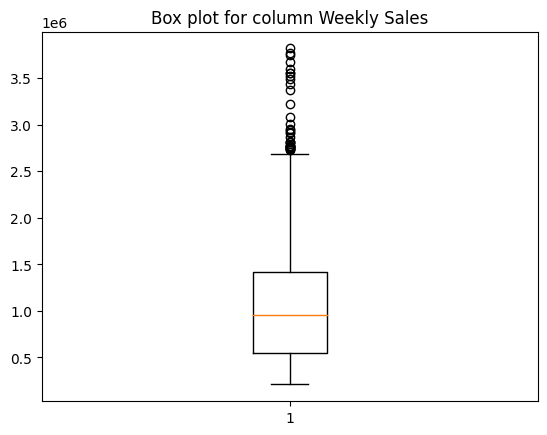

In [5]:
import matplotlib.pyplot as plt

plt.boxplot(df['Weekly_Sales'])
plt.title('Box plot for column Weekly Sales')
plt.show()


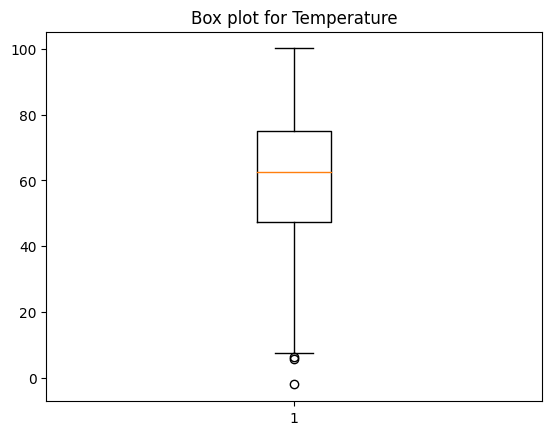

In [6]:
plt.boxplot(df['Temperature'])
plt.title('Box plot for Temperature')
plt.show()

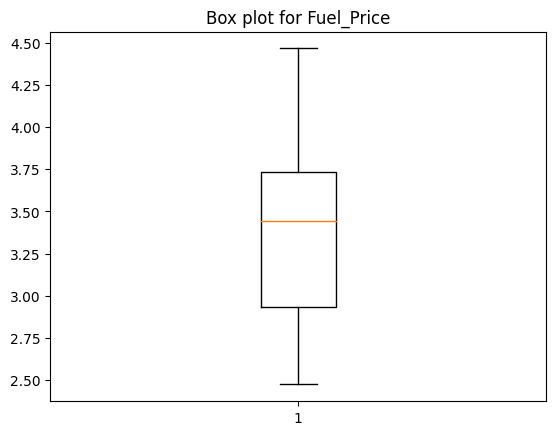

In [7]:
plt.boxplot(df['Fuel_Price'])
plt.title('Box plot for Fuel_Price')
plt.show()

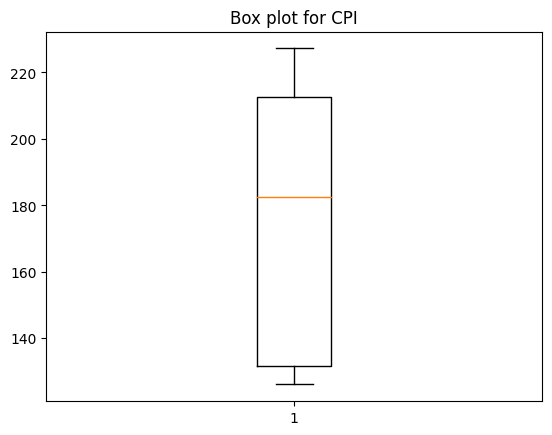

In [8]:
plt.boxplot(df['CPI'])
plt.title('Box plot for CPI')
plt.show()

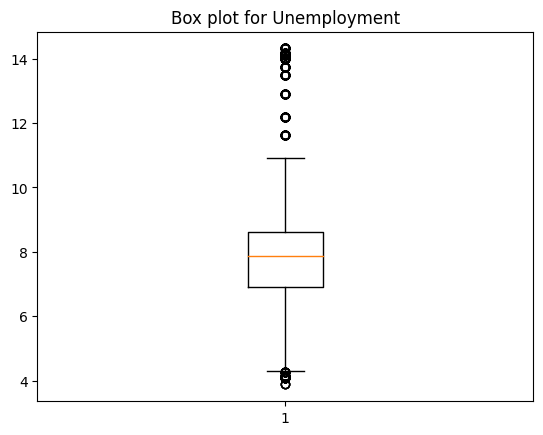

In [9]:
plt.boxplot(df['Unemployment'])
plt.title('Box plot for Unemployment')
plt.show()

In [10]:
print(max(df['Weekly_Sales']))
print(df['Weekly_Sales'].mean())

3818686.45
1046964.8775617715


## Outliers in Weekly Sales

In [11]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['Weekly_Sales'].quantile(0.25)
Q3 = df['Weekly_Sales'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
## getting the indices of outliers
outliers_iqr = df[(df['Weekly_Sales'] < lower_bound) | (df['Weekly_Sales'] > upper_bound)]
outlier_indices_iqr = outliers_iqr.index
print("Outliers based on IQR:")
print(outliers_iqr)
print("Indices of outliers based on IQR:")
print(outlier_indices_iqr)


Outliers based on IQR:
      Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
189       2  24-12-2010    3436007.68             0        49.97       2.886   
241       2  23-12-2011    3224369.80             0        46.66       3.112   
471       4  26-11-2010    2789469.45             1        48.08       2.752   
474       4  17-12-2010    2740057.14             0        46.57       2.884   
475       4  24-12-2010    3526713.39             0        43.21       2.887   
523       4  25-11-2011    3004702.33             1        47.96       3.225   
526       4  16-12-2011    2771397.17             0        36.44       3.149   
527       4  23-12-2011    3676388.98             0        35.92       3.103   
761       6  24-12-2010    2727575.18             0        55.07       2.886   
1329     10  26-11-2010    2939946.38             1        55.33       3.162   
1332     10  17-12-2010    2811646.85             0        59.15       3.125   
1333     10  24-1

## Outliers in Temperature

In [12]:
Q1 = df['Temperature'].quantile(0.25)
Q3 = df['Temperature'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# getting the indices of outliers
outliers_iq = df[(df['Temperature'] < lower_bound) | (df['Temperature'] > upper_bound)]
outlier_indices_iqr = outliers_iq.index
print("Outliers based on IQR:")
print(outliers_iq)
print("Indices of outliers based on IQR:")
print(outlier_indices_iqr)

Outliers based on IQR:
      Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
910       7  04-02-2011     558027.77             0        -2.06       3.011   
2336     17  07-01-2011    1083071.14             0         6.23       2.891   
3626     26  28-01-2011     817485.14             0         5.54       3.243   

             CPI  Unemployment  
910   191.762589         8.818  
2336  127.191774         6.866  
3626  133.105968         7.907  
Indices of outliers based on IQR:
Index([910, 2336, 3626], dtype='int64')


## Outliers in Fuel Price

In [13]:
Q1 = df['Fuel_Price'].quantile(0.25)
Q3 = df['Fuel_Price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# getting the indices of outliers
outliers_iq = df[(df['Fuel_Price'] < lower_bound) | (df['Fuel_Price'] > upper_bound)]
outlier_indices_iqr = outliers_iq.index
print("Outliers based on IQR:")
print(outliers_iq)
print("Indices of outliers based on IQR:")
print(outlier_indices_iqr)

Outliers based on IQR:
Empty DataFrame
Columns: [Store, Date, Weekly_Sales, Holiday_Flag, Temperature, Fuel_Price, CPI, Unemployment]
Index: []
Indices of outliers based on IQR:
Index([], dtype='int64')


## Outliers in CPI

In [14]:
Q1 = df['CPI'].quantile(0.25)
Q3 = df['CPI'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# getting the indices of outliers
outliers_iq = df[(df['CPI'] < lower_bound) | (df['CPI'] > upper_bound)]
outlier_indices_iqr = outliers_iq.index
print("Outliers based on IQR:")
print(outliers_iq)
print("Indices of outliers based on IQR:")
print(outlier_indices_iqr)

Outliers based on IQR:
Empty DataFrame
Columns: [Store, Date, Weekly_Sales, Holiday_Flag, Temperature, Fuel_Price, CPI, Unemployment]
Index: []
Indices of outliers based on IQR:
Index([], dtype='int64')


## Outliers in Unemployment

In [15]:
Q1 = df['Unemployment'].quantile(0.25)
Q3 = df['Unemployment'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# getting the indices of outliers
outliers_iq = df[(df['Unemployment'] < lower_bound) | (df['Unemployment'] > upper_bound)]
outlier_indices_iqr = outliers_iq.index
print("Outliers based on IQR:")
print(outliers_iq)
print("Indices of outliers based on IQR:")
print(outlier_indices_iqr)

Outliers based on IQR:
      Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
555       4  06-07-2012    2224499.28             0        80.37       3.187   
556       4  13-07-2012    2100252.61             0        76.86       3.224   
557       4  20-07-2012    2175563.69             0        79.14       3.263   
558       4  27-07-2012    2048613.65             0        81.06       3.356   
559       4  03-08-2012    2174514.13             0        83.86       3.374   
...     ...         ...           ...           ...          ...         ...   
5715     40  28-09-2012     919595.44             0        50.98       4.018   
5716     40  05-10-2012    1069112.00             0        57.21       4.027   
5717     40  12-10-2012     982523.26             0        47.35       4.029   
5718     40  19-10-2012     918170.50             0        46.33       4.000   
5719     40  26-10-2012     921264.52             0        49.65       3.917   

             CPI

## Correcting Outliers

## Weekly Sales

In [16]:
# Cap the outliers percentiles
lower_cap = df['Weekly_Sales'].quantile(0.25)
upper_cap = df['Weekly_Sales'].quantile(0.75)
df['Weekly_Sales'] = df['Weekly_Sales'].apply(lambda x: lower_cap if x < lower_cap else upper_cap if x > upper_cap else x)


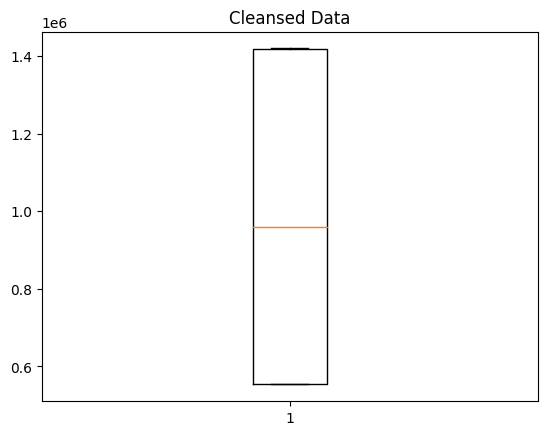

In [17]:
plt.boxplot(df['Weekly_Sales'])
plt.title('Cleansed Data')
plt.show()

## Temperature

In [18]:
lower_cap = df['Temperature'].quantile(0.25)
upper_cap = df['Temperature'].quantile(0.75)
df['Temperature'] = df['Temperature'].apply(lambda x: lower_cap if x < lower_cap else upper_cap if x > upper_cap else x)


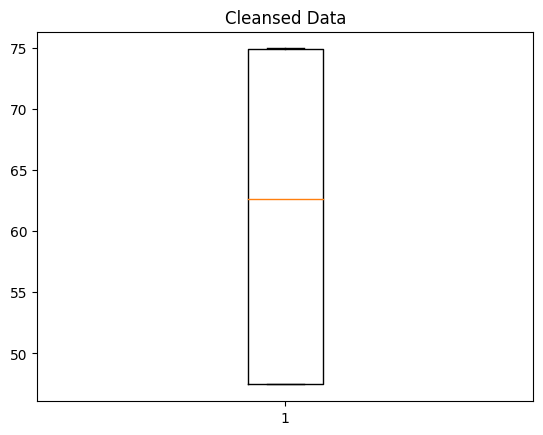

In [19]:
plt.boxplot(df['Temperature'])
plt.title('Cleansed Data')
plt.show()

## Unemployement

In [20]:
lower_cap = df['Unemployment'].quantile(0.25)
upper_cap = df['Unemployment'].quantile(0.75)
df['Unemployment'] = df['Unemployment'].apply(lambda x: lower_cap if x < lower_cap else upper_cap if x > upper_cap else x)


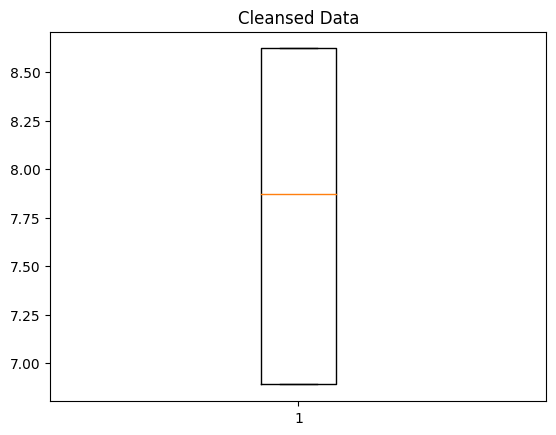

In [21]:
plt.boxplot(df['Unemployment'])
plt.title('Cleansed Data')
plt.show()

##  Exploratory Data Analysis

In [22]:
dates = df['Date']
WeeklySales = df['Weekly_Sales']

### Plotting Weekly Sales against the Dates

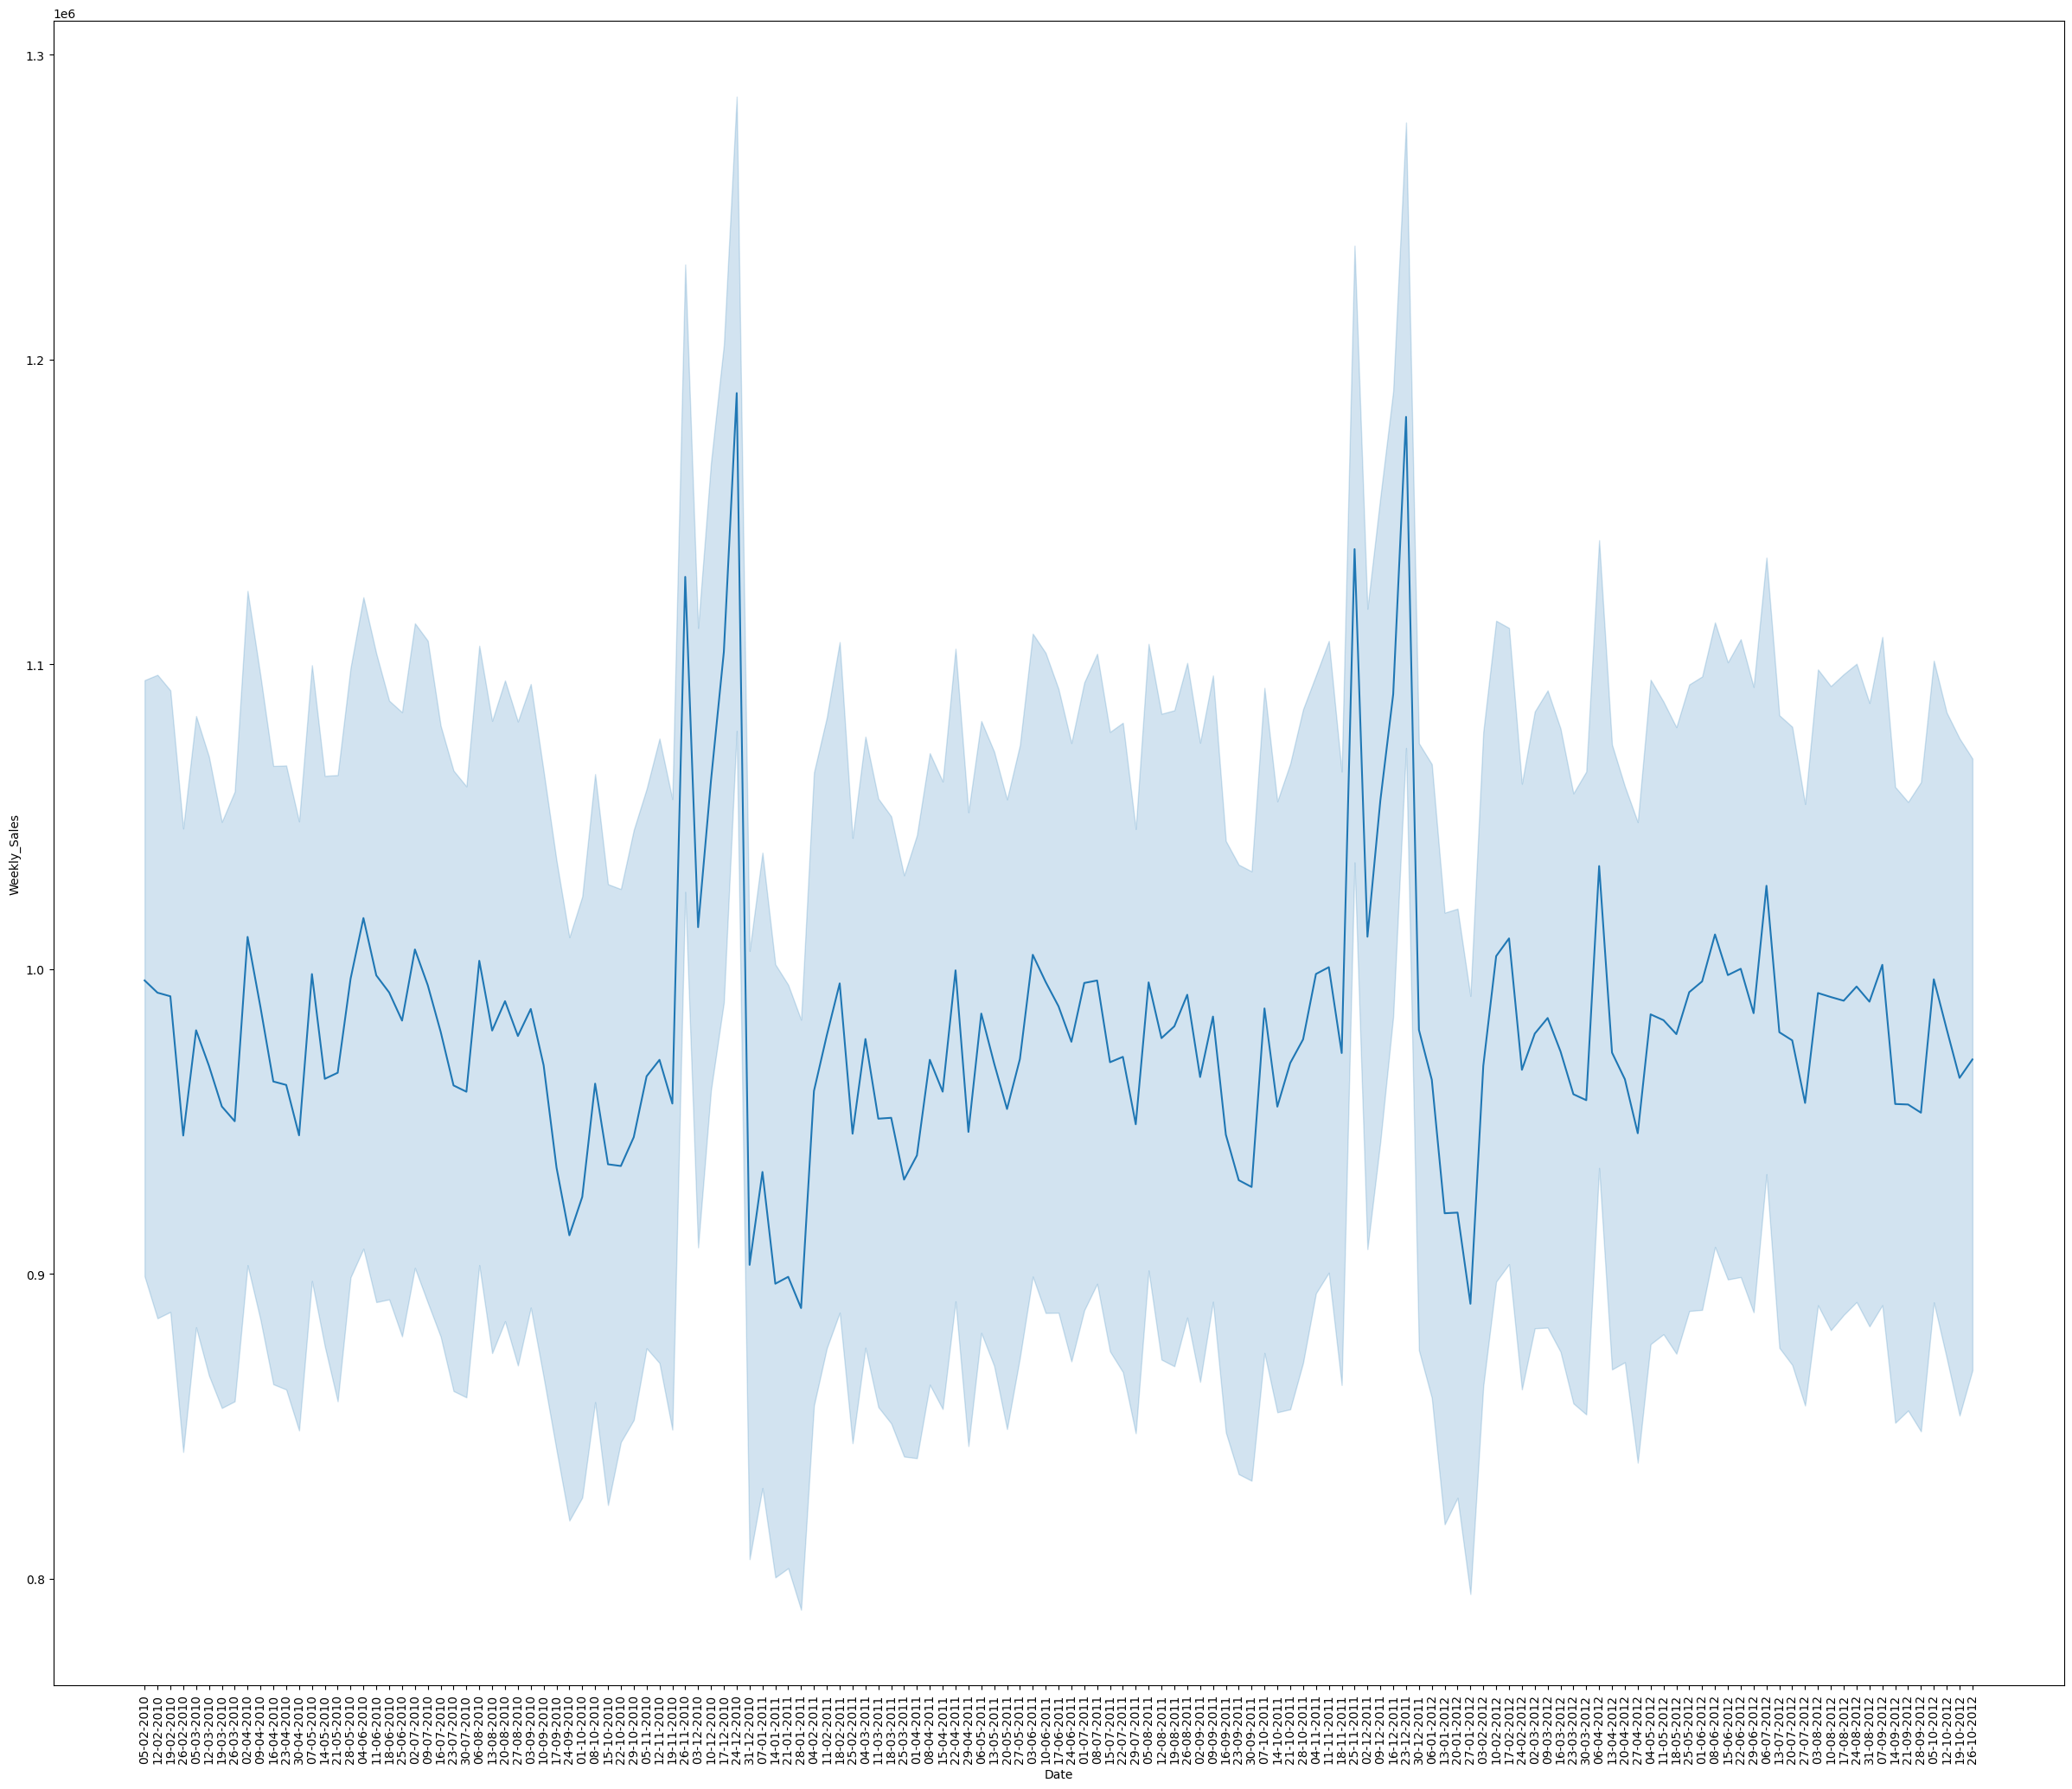

In [23]:
import seaborn as sns
dates = df['Date']
WeeklySales = df['Weekly_Sales']
plt.figure(figsize=(30, 25)) 
sns.lineplot(data=df, x=dates, y=WeeklySales)
plt.xticks(rotation=90) 
plt.show()


### Store No. which has the highest Weekly Sale

In [31]:
highest_sale = df['Weekly_Sales'].idxmax()
Store_num = df['Store'][highest_sale]
print('Store that has Highest Weekly Sale')
print('Store Number:',Store_num)

Store that has Highest Weekly Sale
Store Number: 1


### Plotting Weekly Sales Against Fuel Price

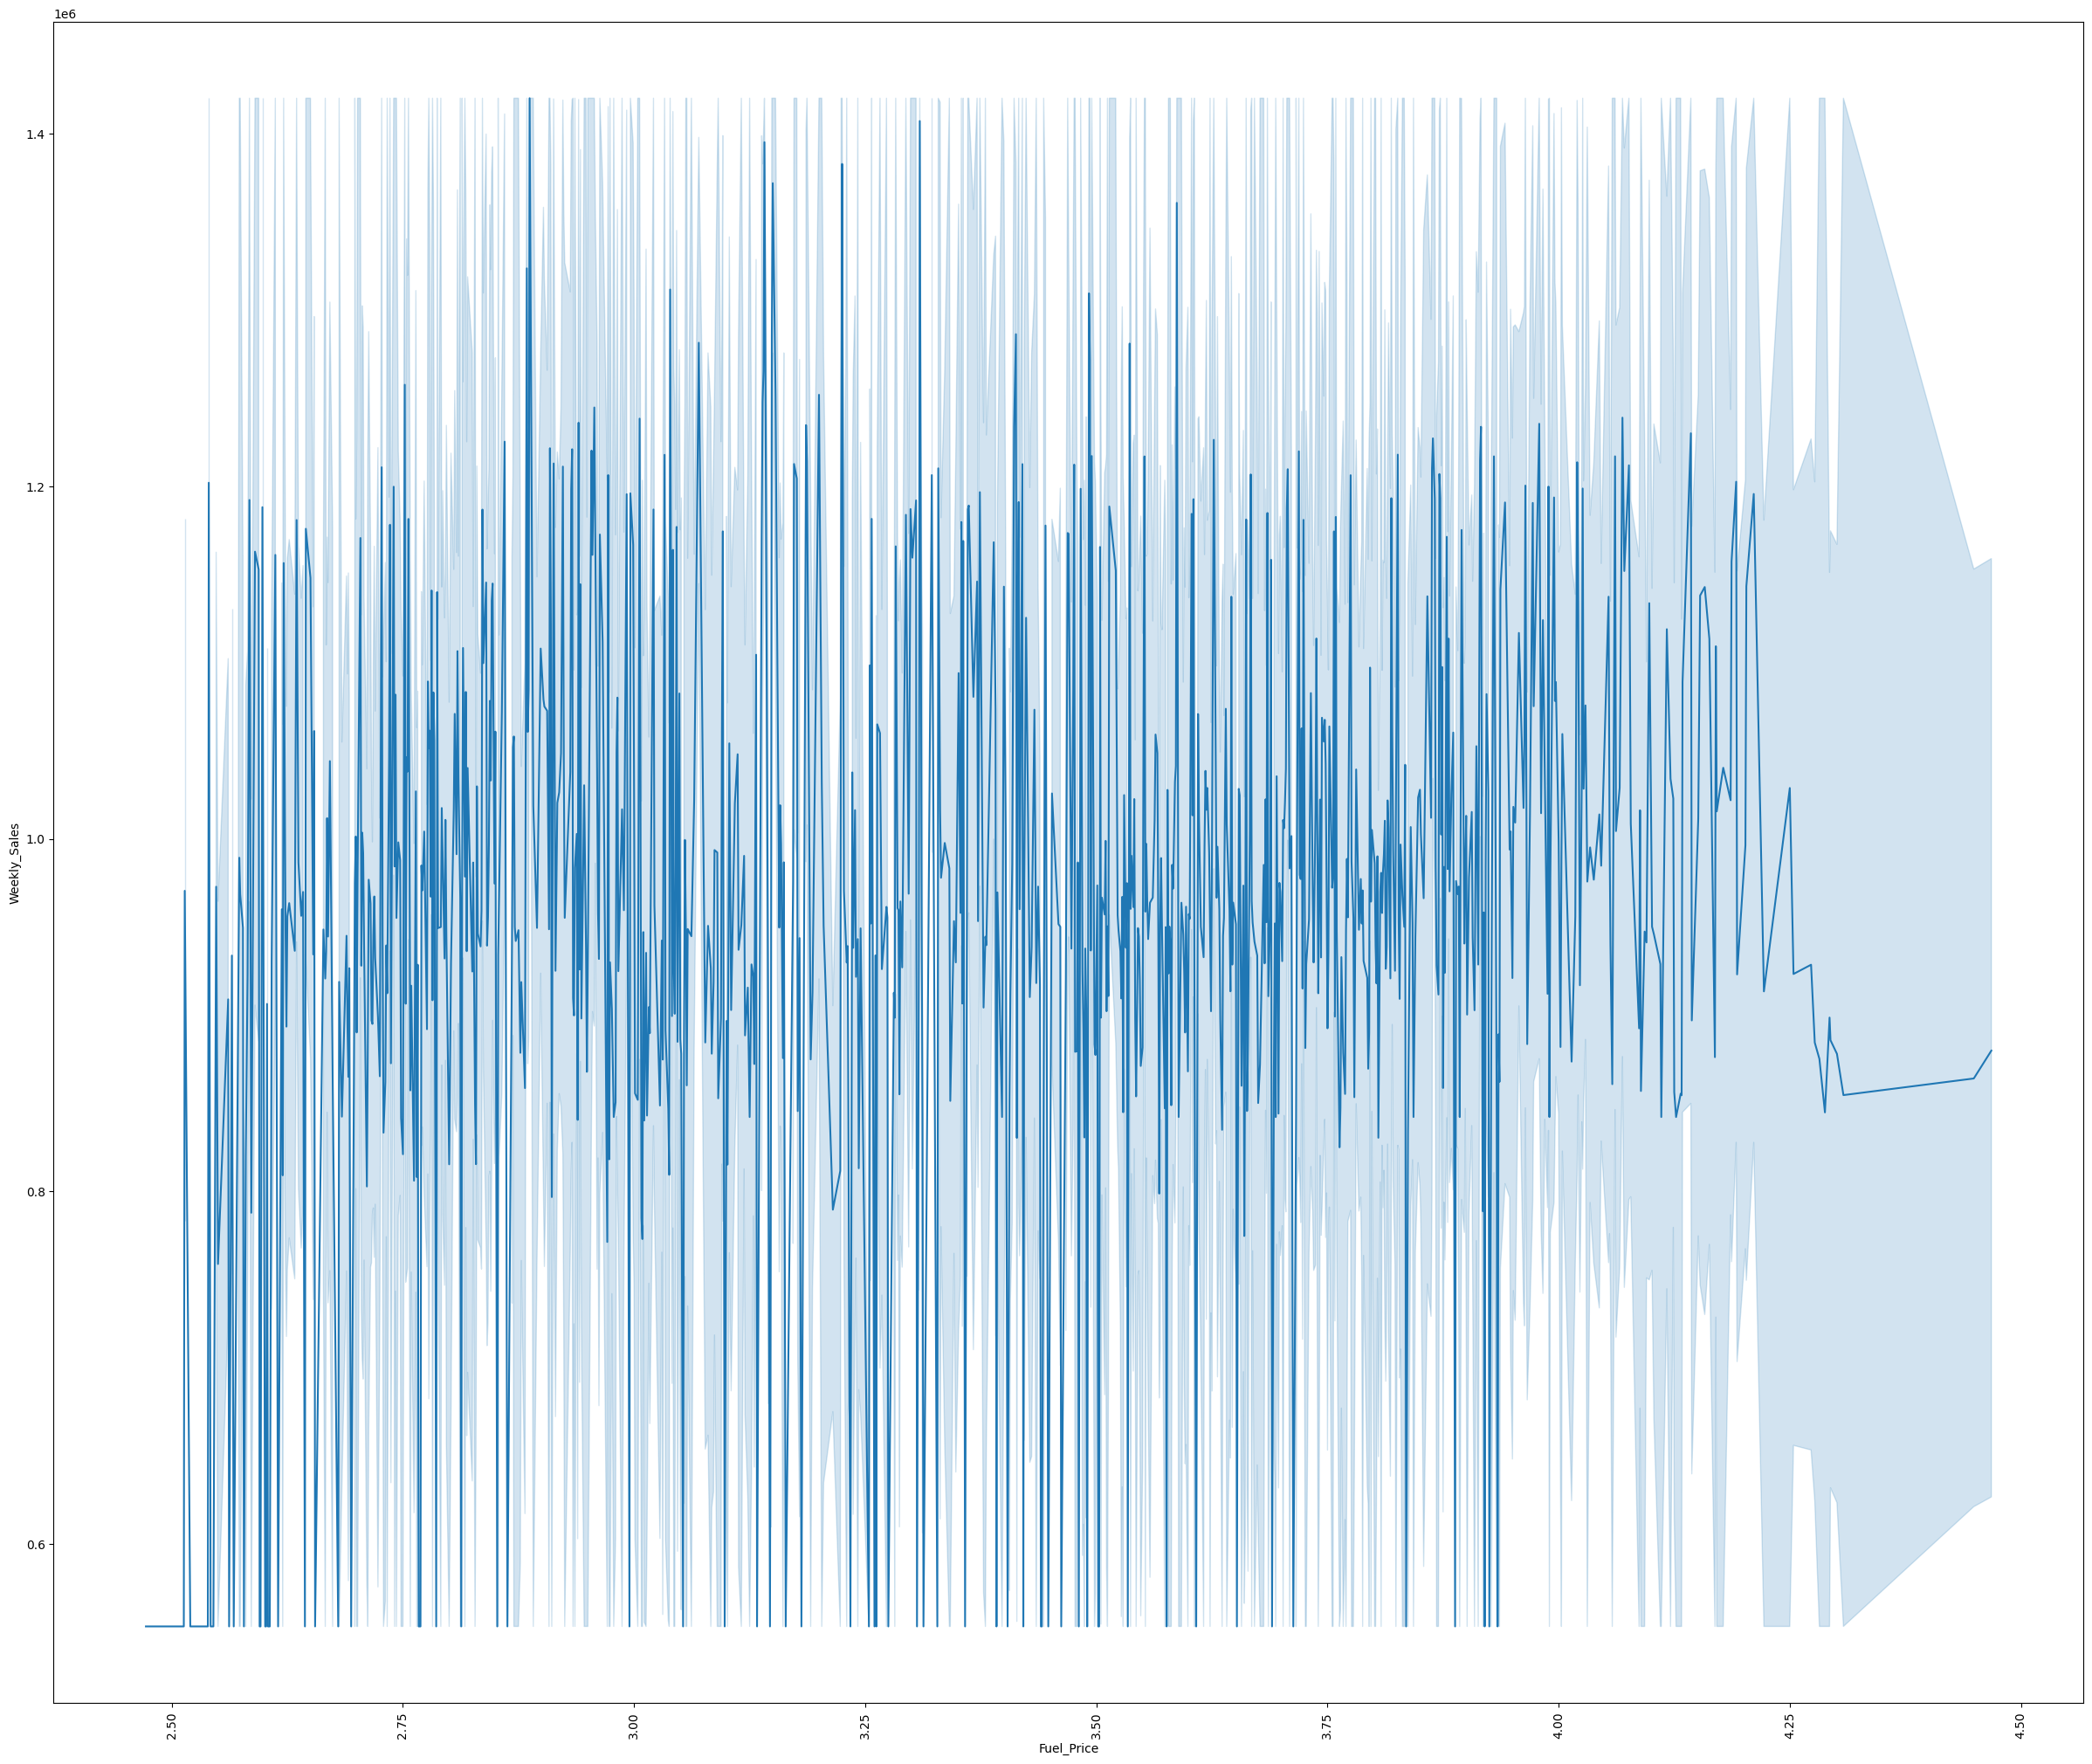

In [32]:
Fp = df['Fuel_Price']
WeeklySales = df['Weekly_Sales']
plt.figure(figsize=(30, 25)) 
sns.lineplot(data=df, x=Fp, y=WeeklySales)
plt.xticks(rotation=90) 
plt.show()


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


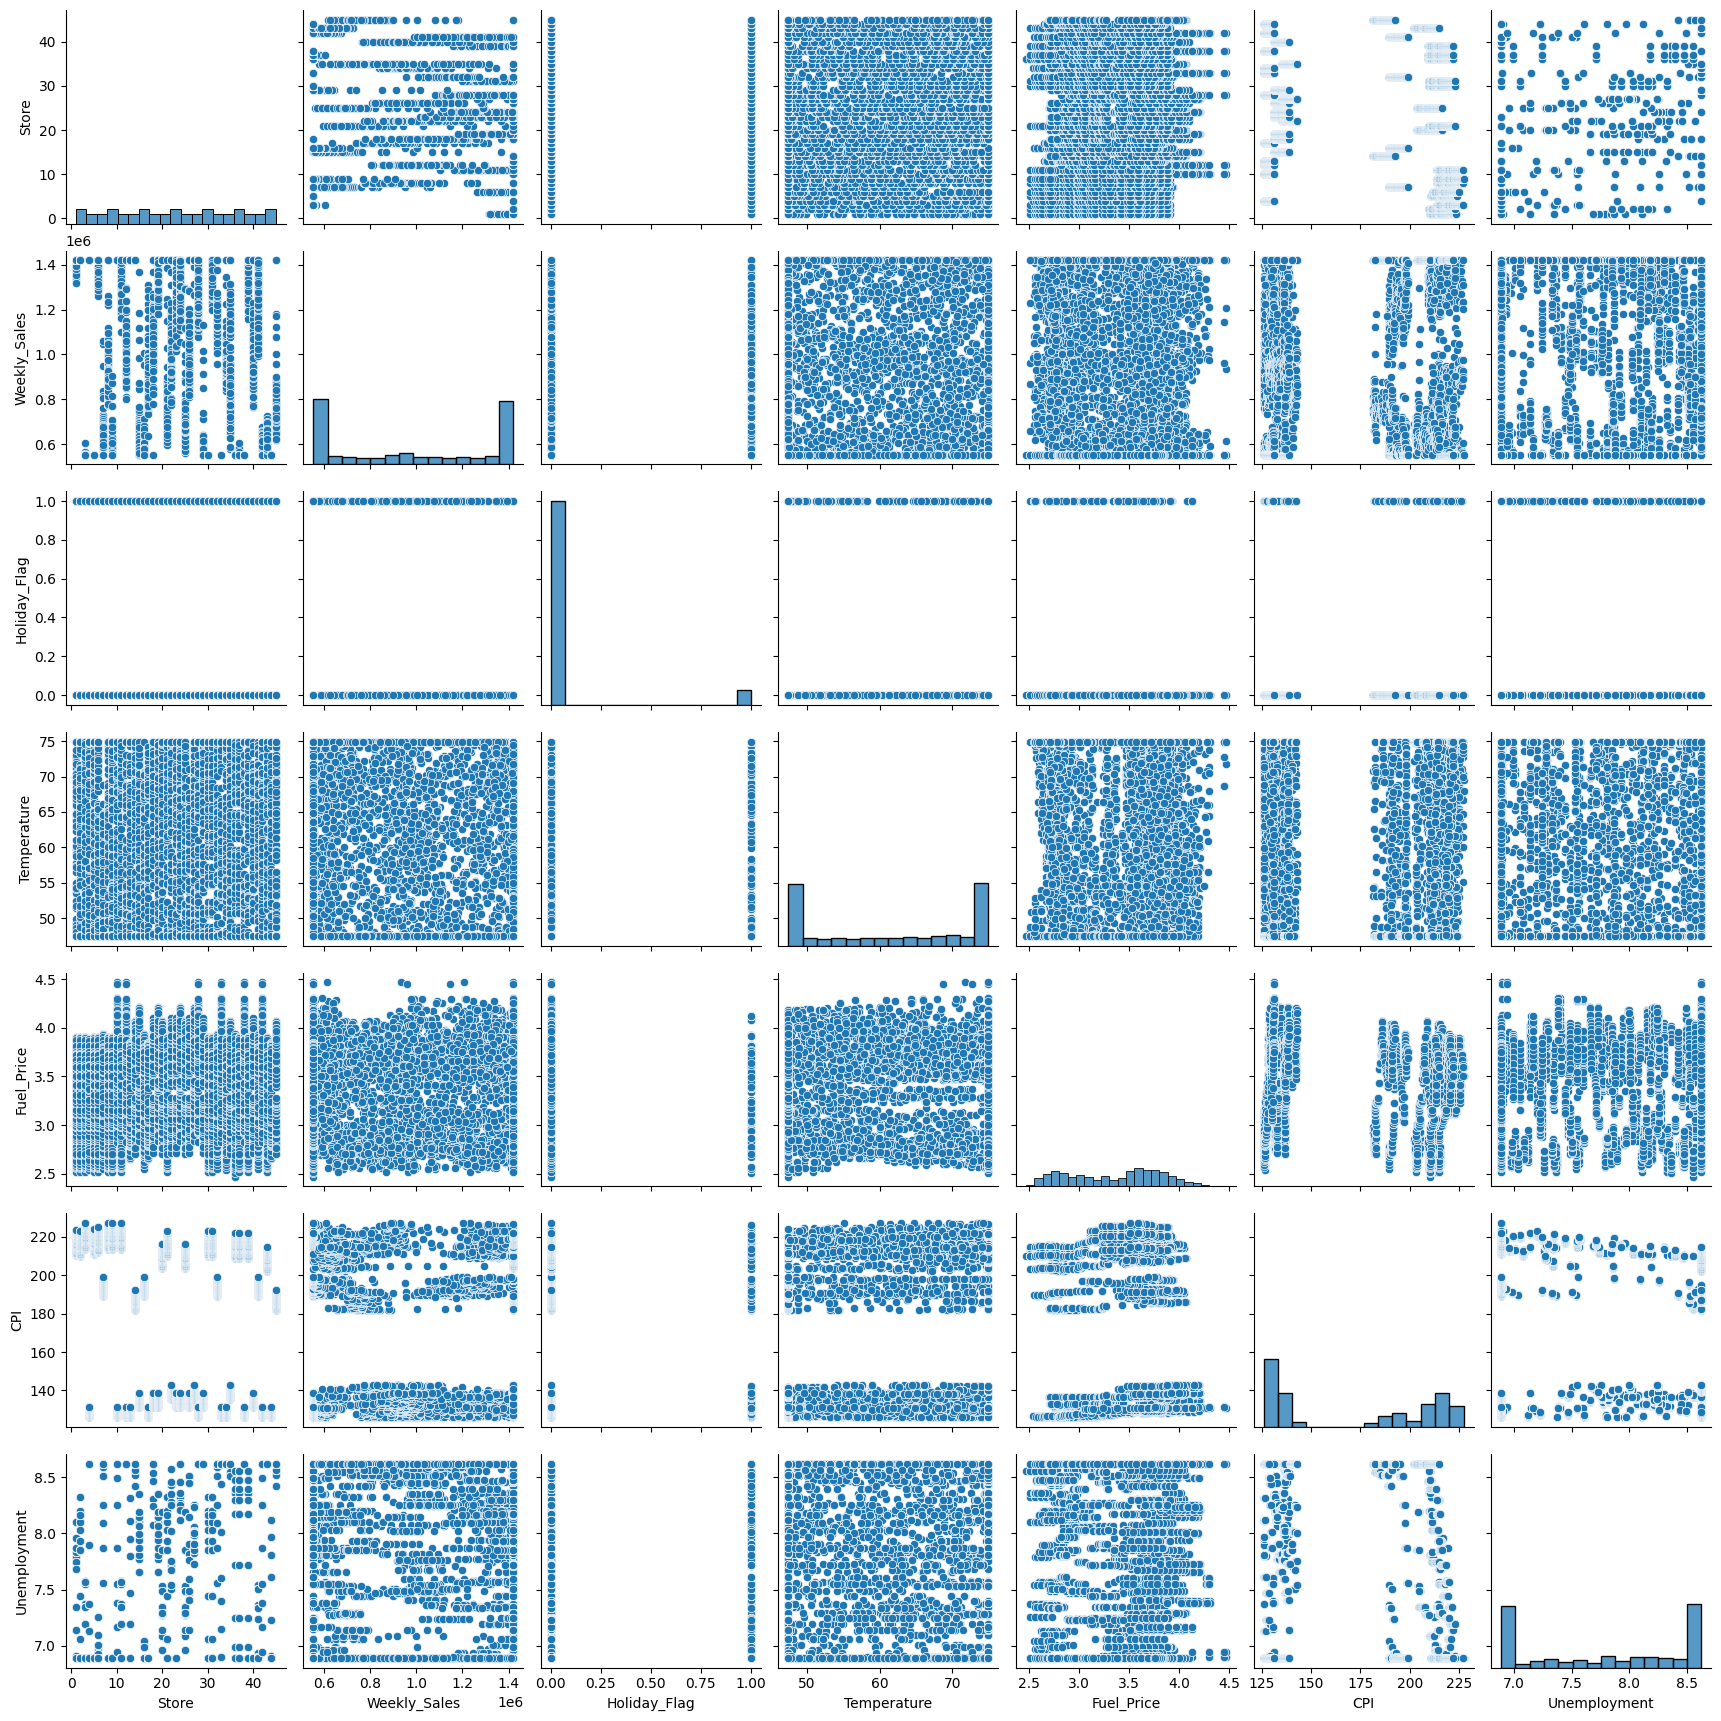

In [35]:
sns.pairplot(df)
plt.show()


### Regression Plot between Fuel Price and Weekly Sales

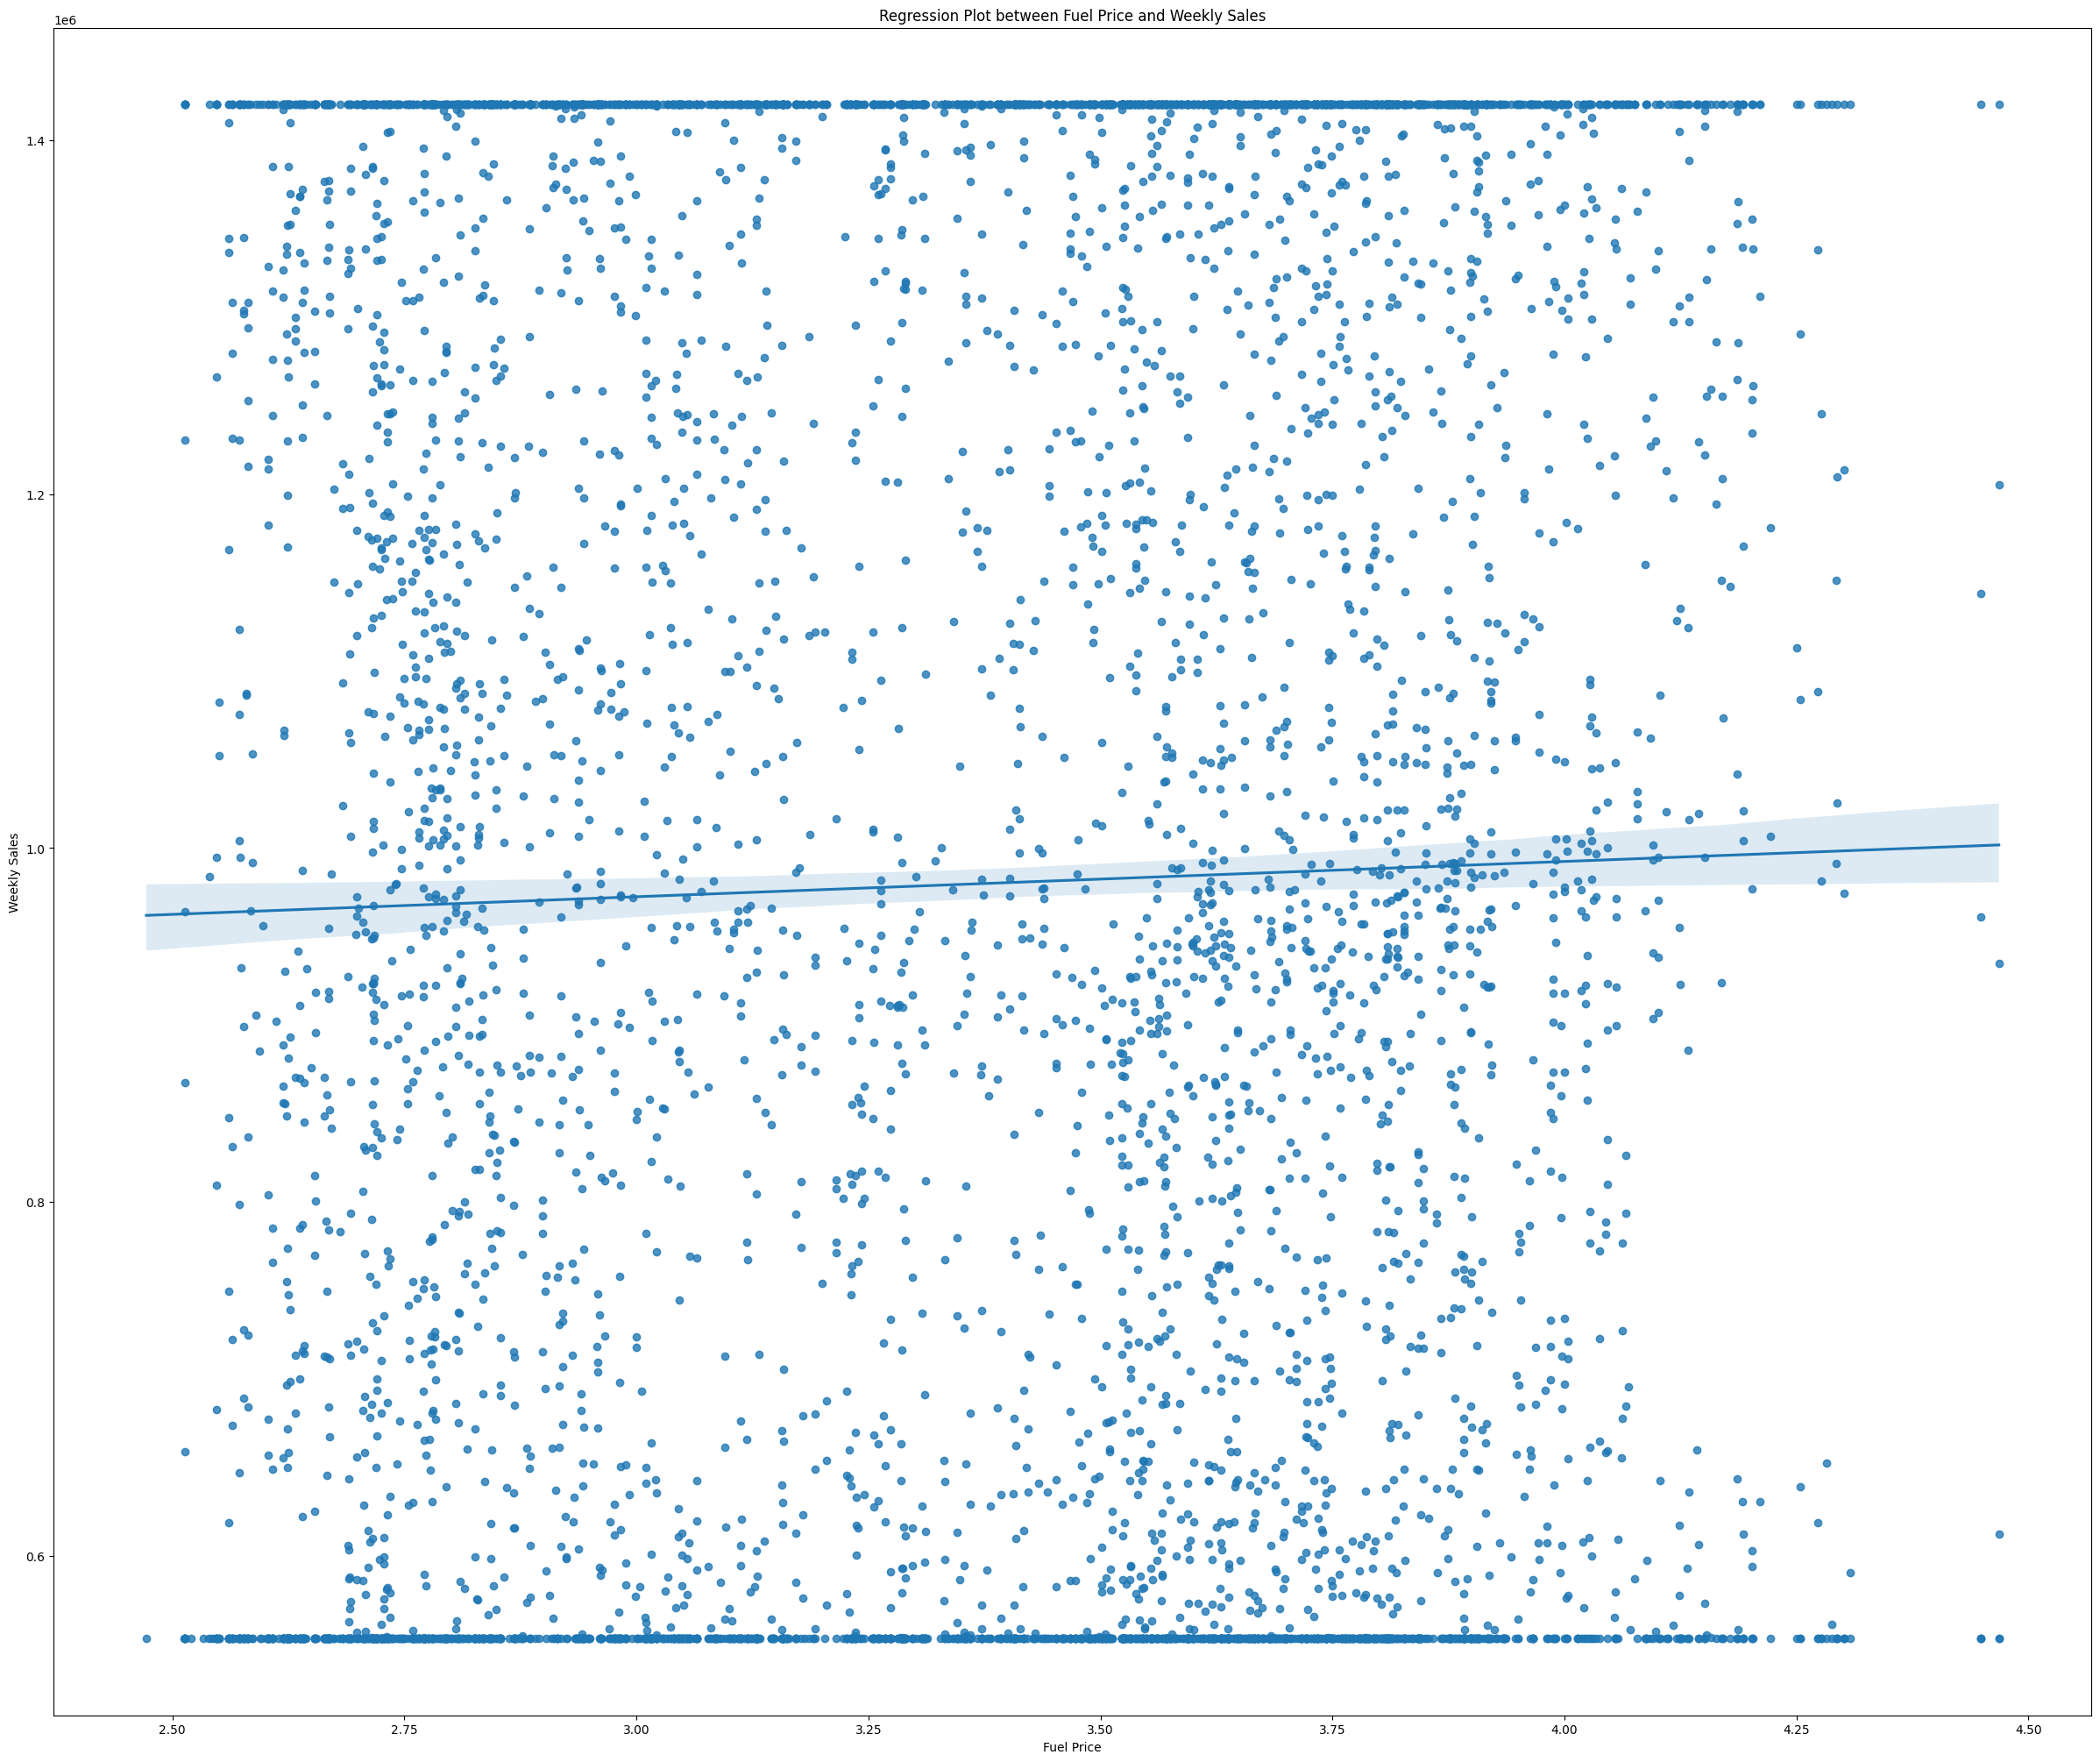

In [39]:
plt.figure(figsize=(30, 25))
sns.regplot(x=Fp, y=WeeklySales, data=df)
plt.title('Regression Plot between Fuel Price and Weekly Sales')
plt.xlabel('Fuel Price')
plt.ylabel('Weekly Sales')
plt.show()

### Regression Plot between Fuel Price and Unemployement

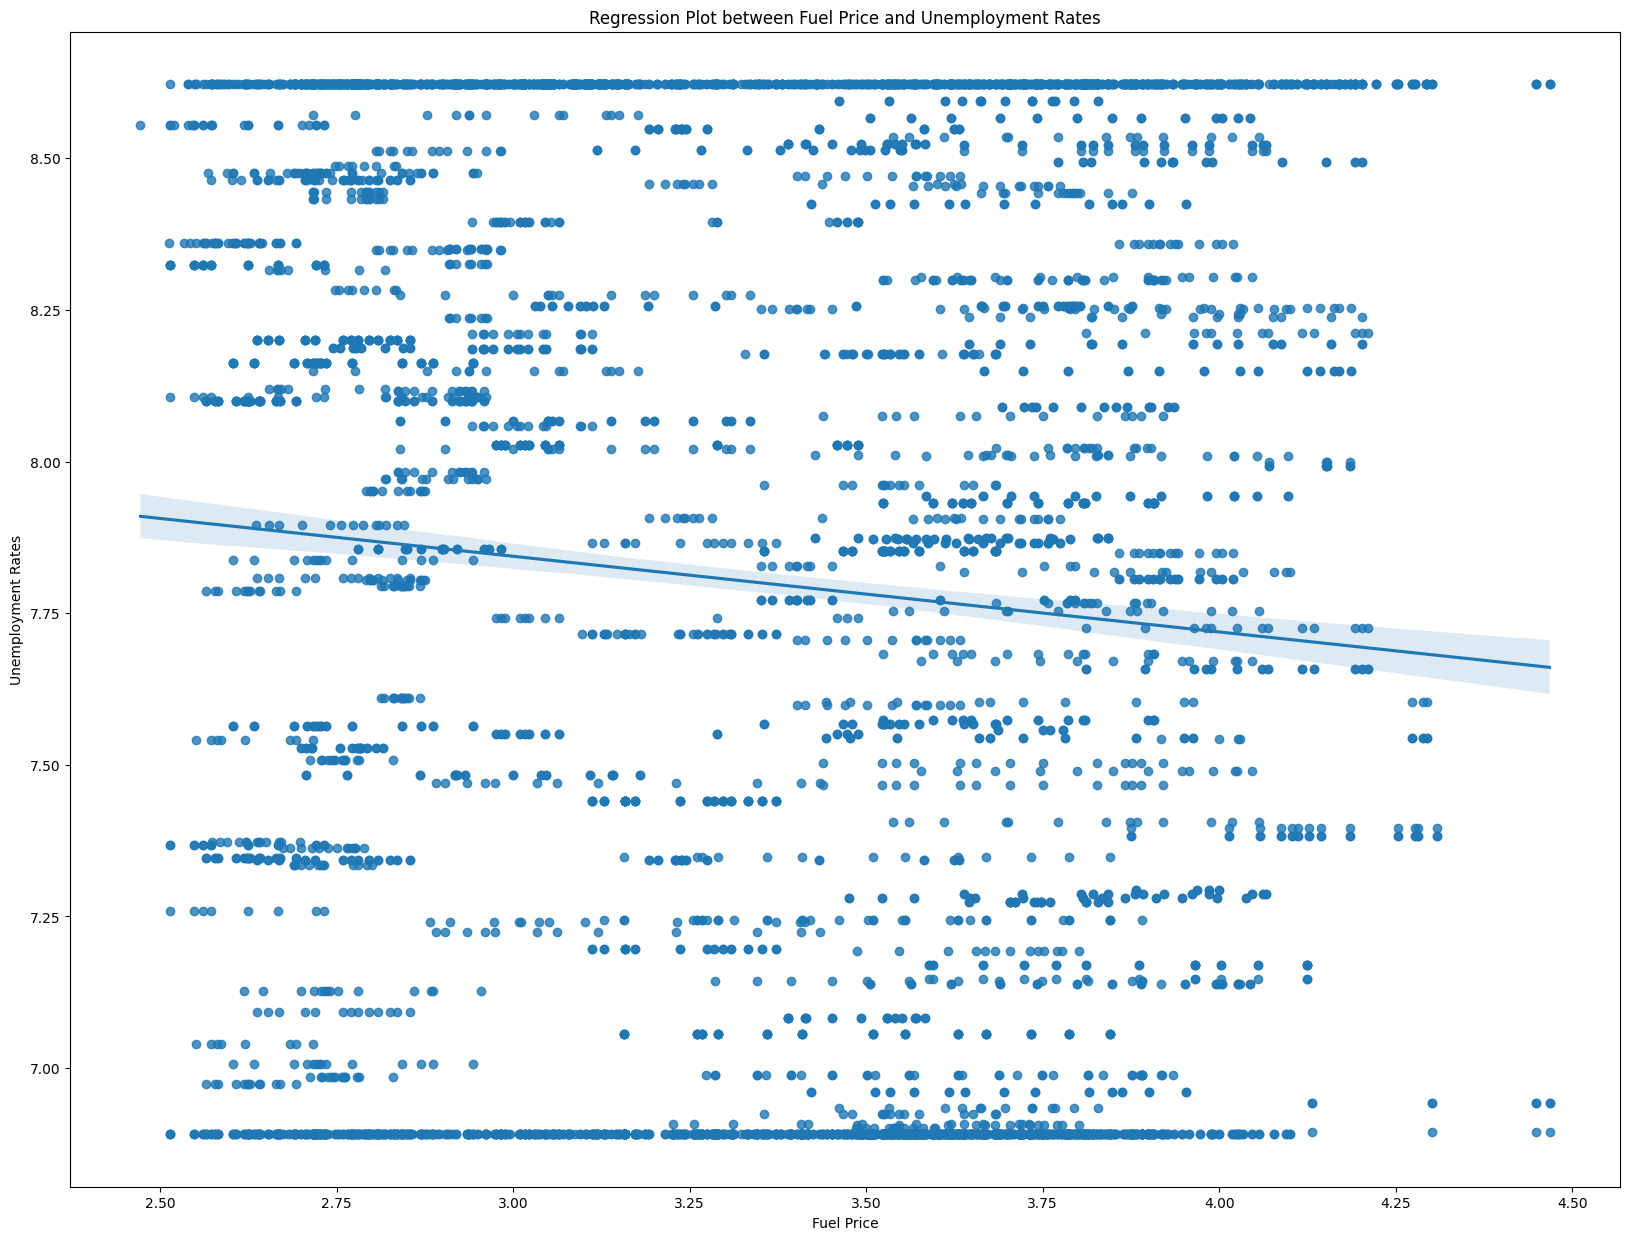

In [42]:
unemployment_rates = df['Unemployment']
plt.figure(figsize=(20, 15))
sns.regplot(x=Fp, y=unemployment_rates, data=df)
plt.title('Regression Plot between Fuel Price and Unemployment Rates')
plt.xlabel('Fuel Price')
plt.ylabel('Unemployment Rates')
plt.show()

### Plot between Weekly Sales and Temperature

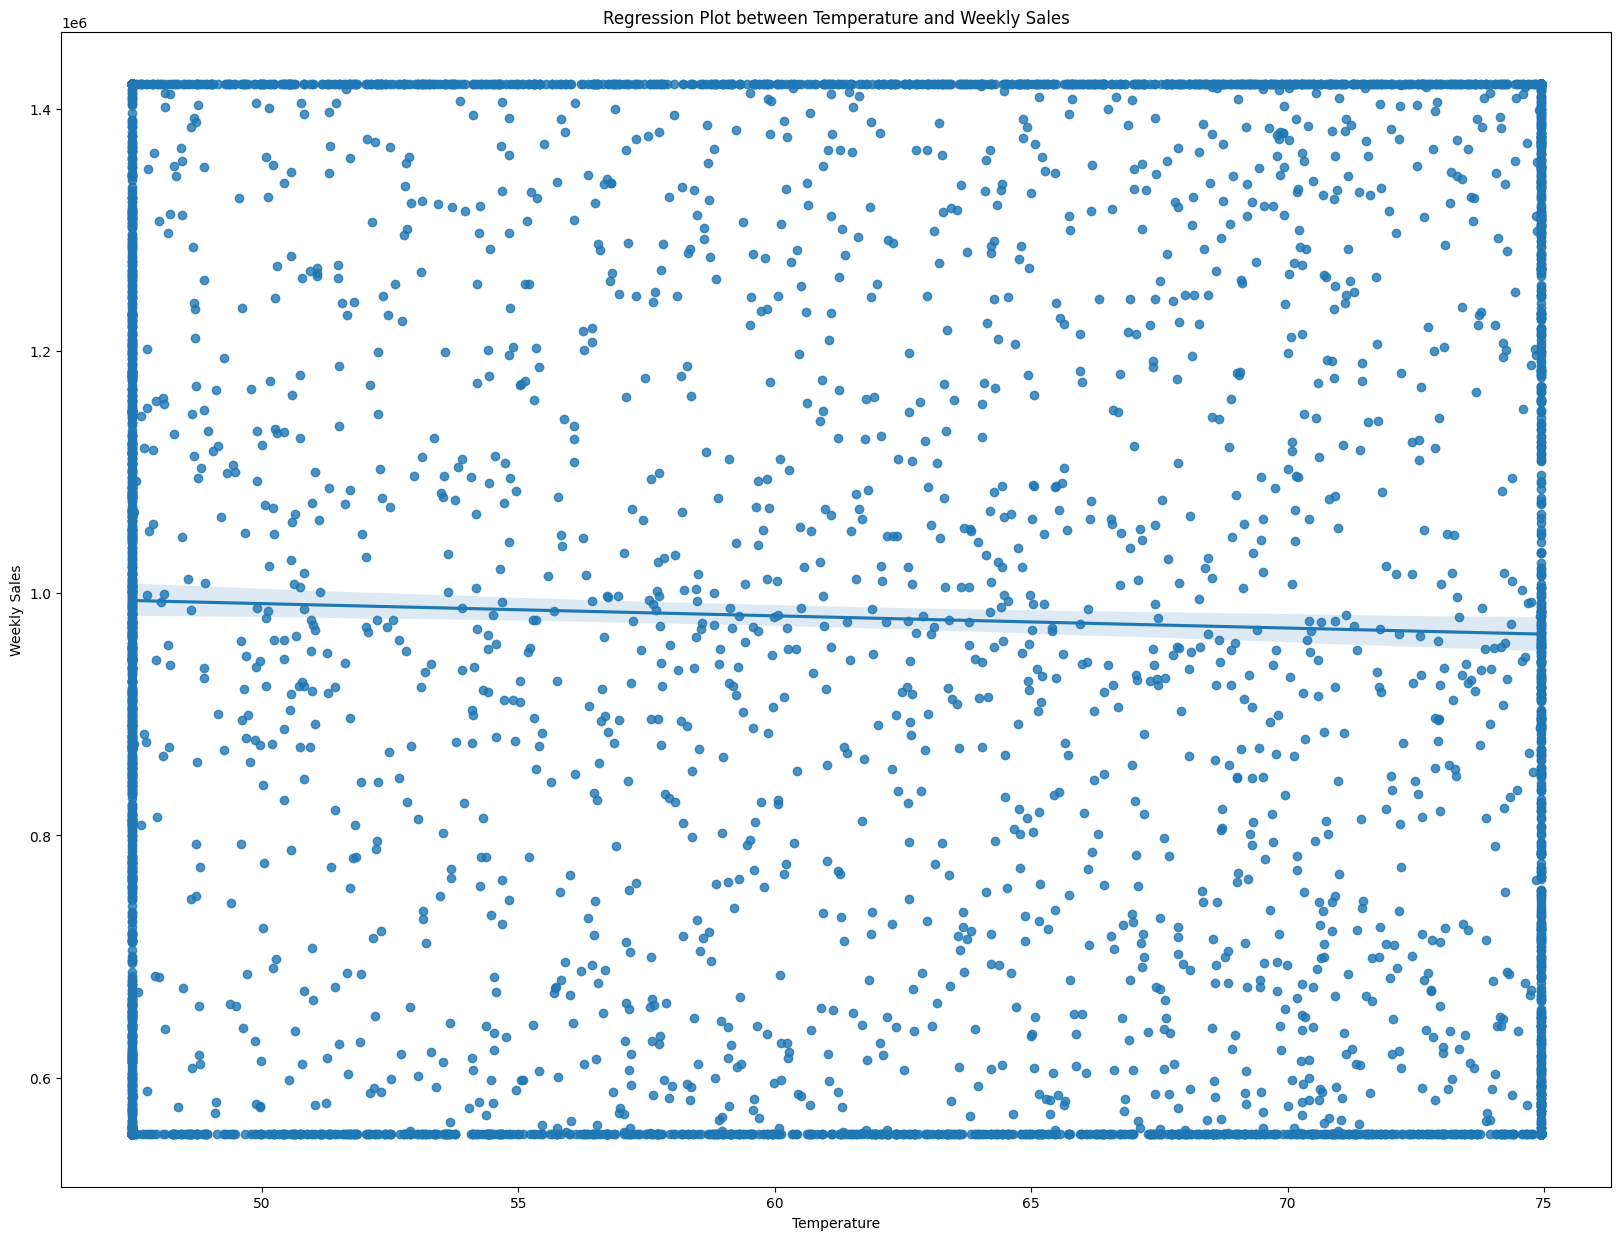

In [44]:
Temperature = df['Temperature']
plt.figure(figsize=(20, 15))
sns.regplot(x=Temperature, y=WeeklySales, data=df)
plt.title('Regression Plot between Temperature and Weekly Sales')
plt.xlabel('Temperature')
plt.ylabel('Weekly Sales')
plt.show()

### Weekly Sales vs Holidays

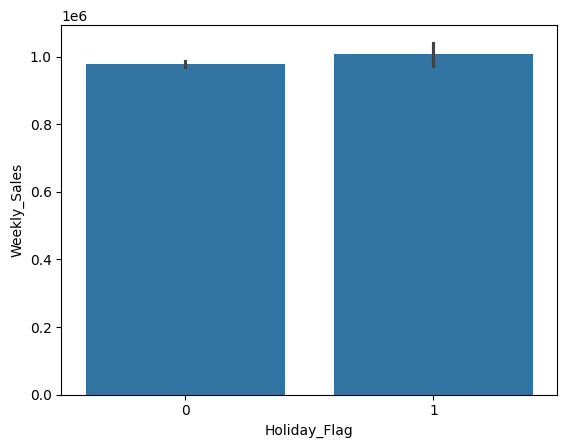

In [45]:
sns.barplot(data=df, x=df['Holiday_Flag'], y=df['Weekly_Sales'])
plt.show()


### CPI vs Fuel Price

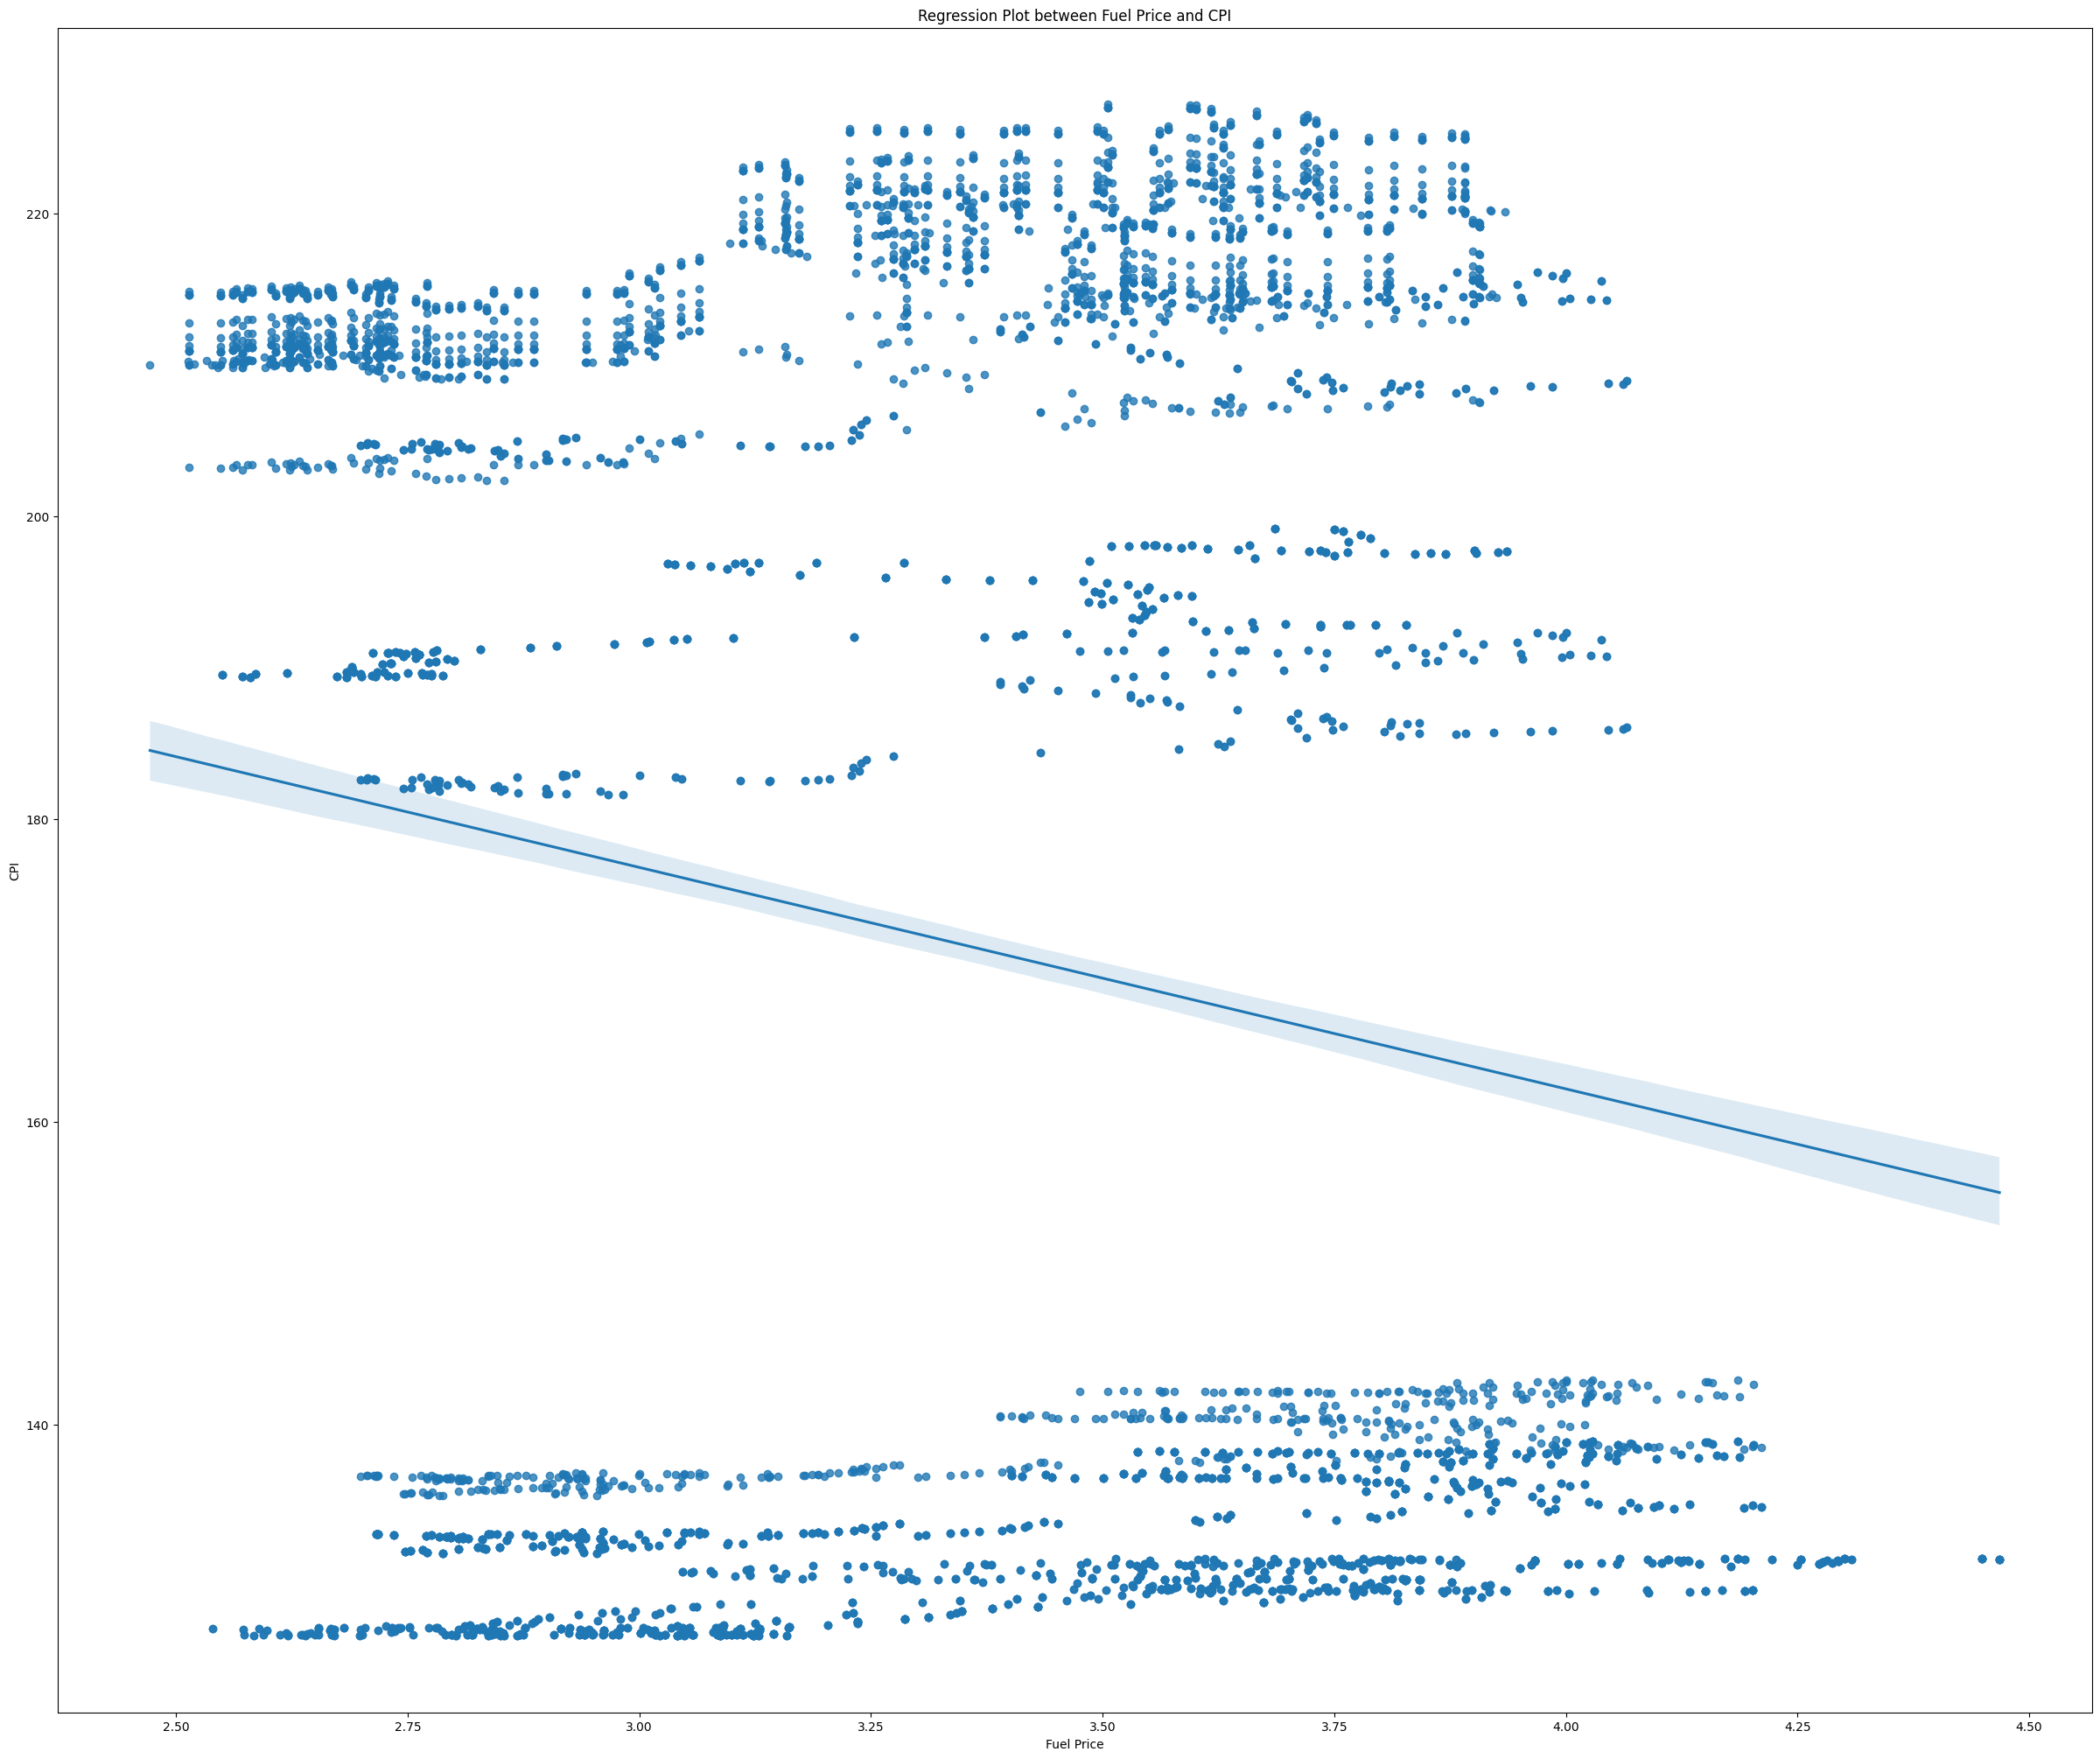

In [46]:
plt.figure(figsize=(30, 25))
sns.regplot(x=Fp, y=df['CPI'], data=df)
plt.title('Regression Plot between Fuel Price and CPI')
plt.xlabel('Fuel Price')
plt.ylabel('CPI')
plt.show()

### CPI vs Weekly Sales

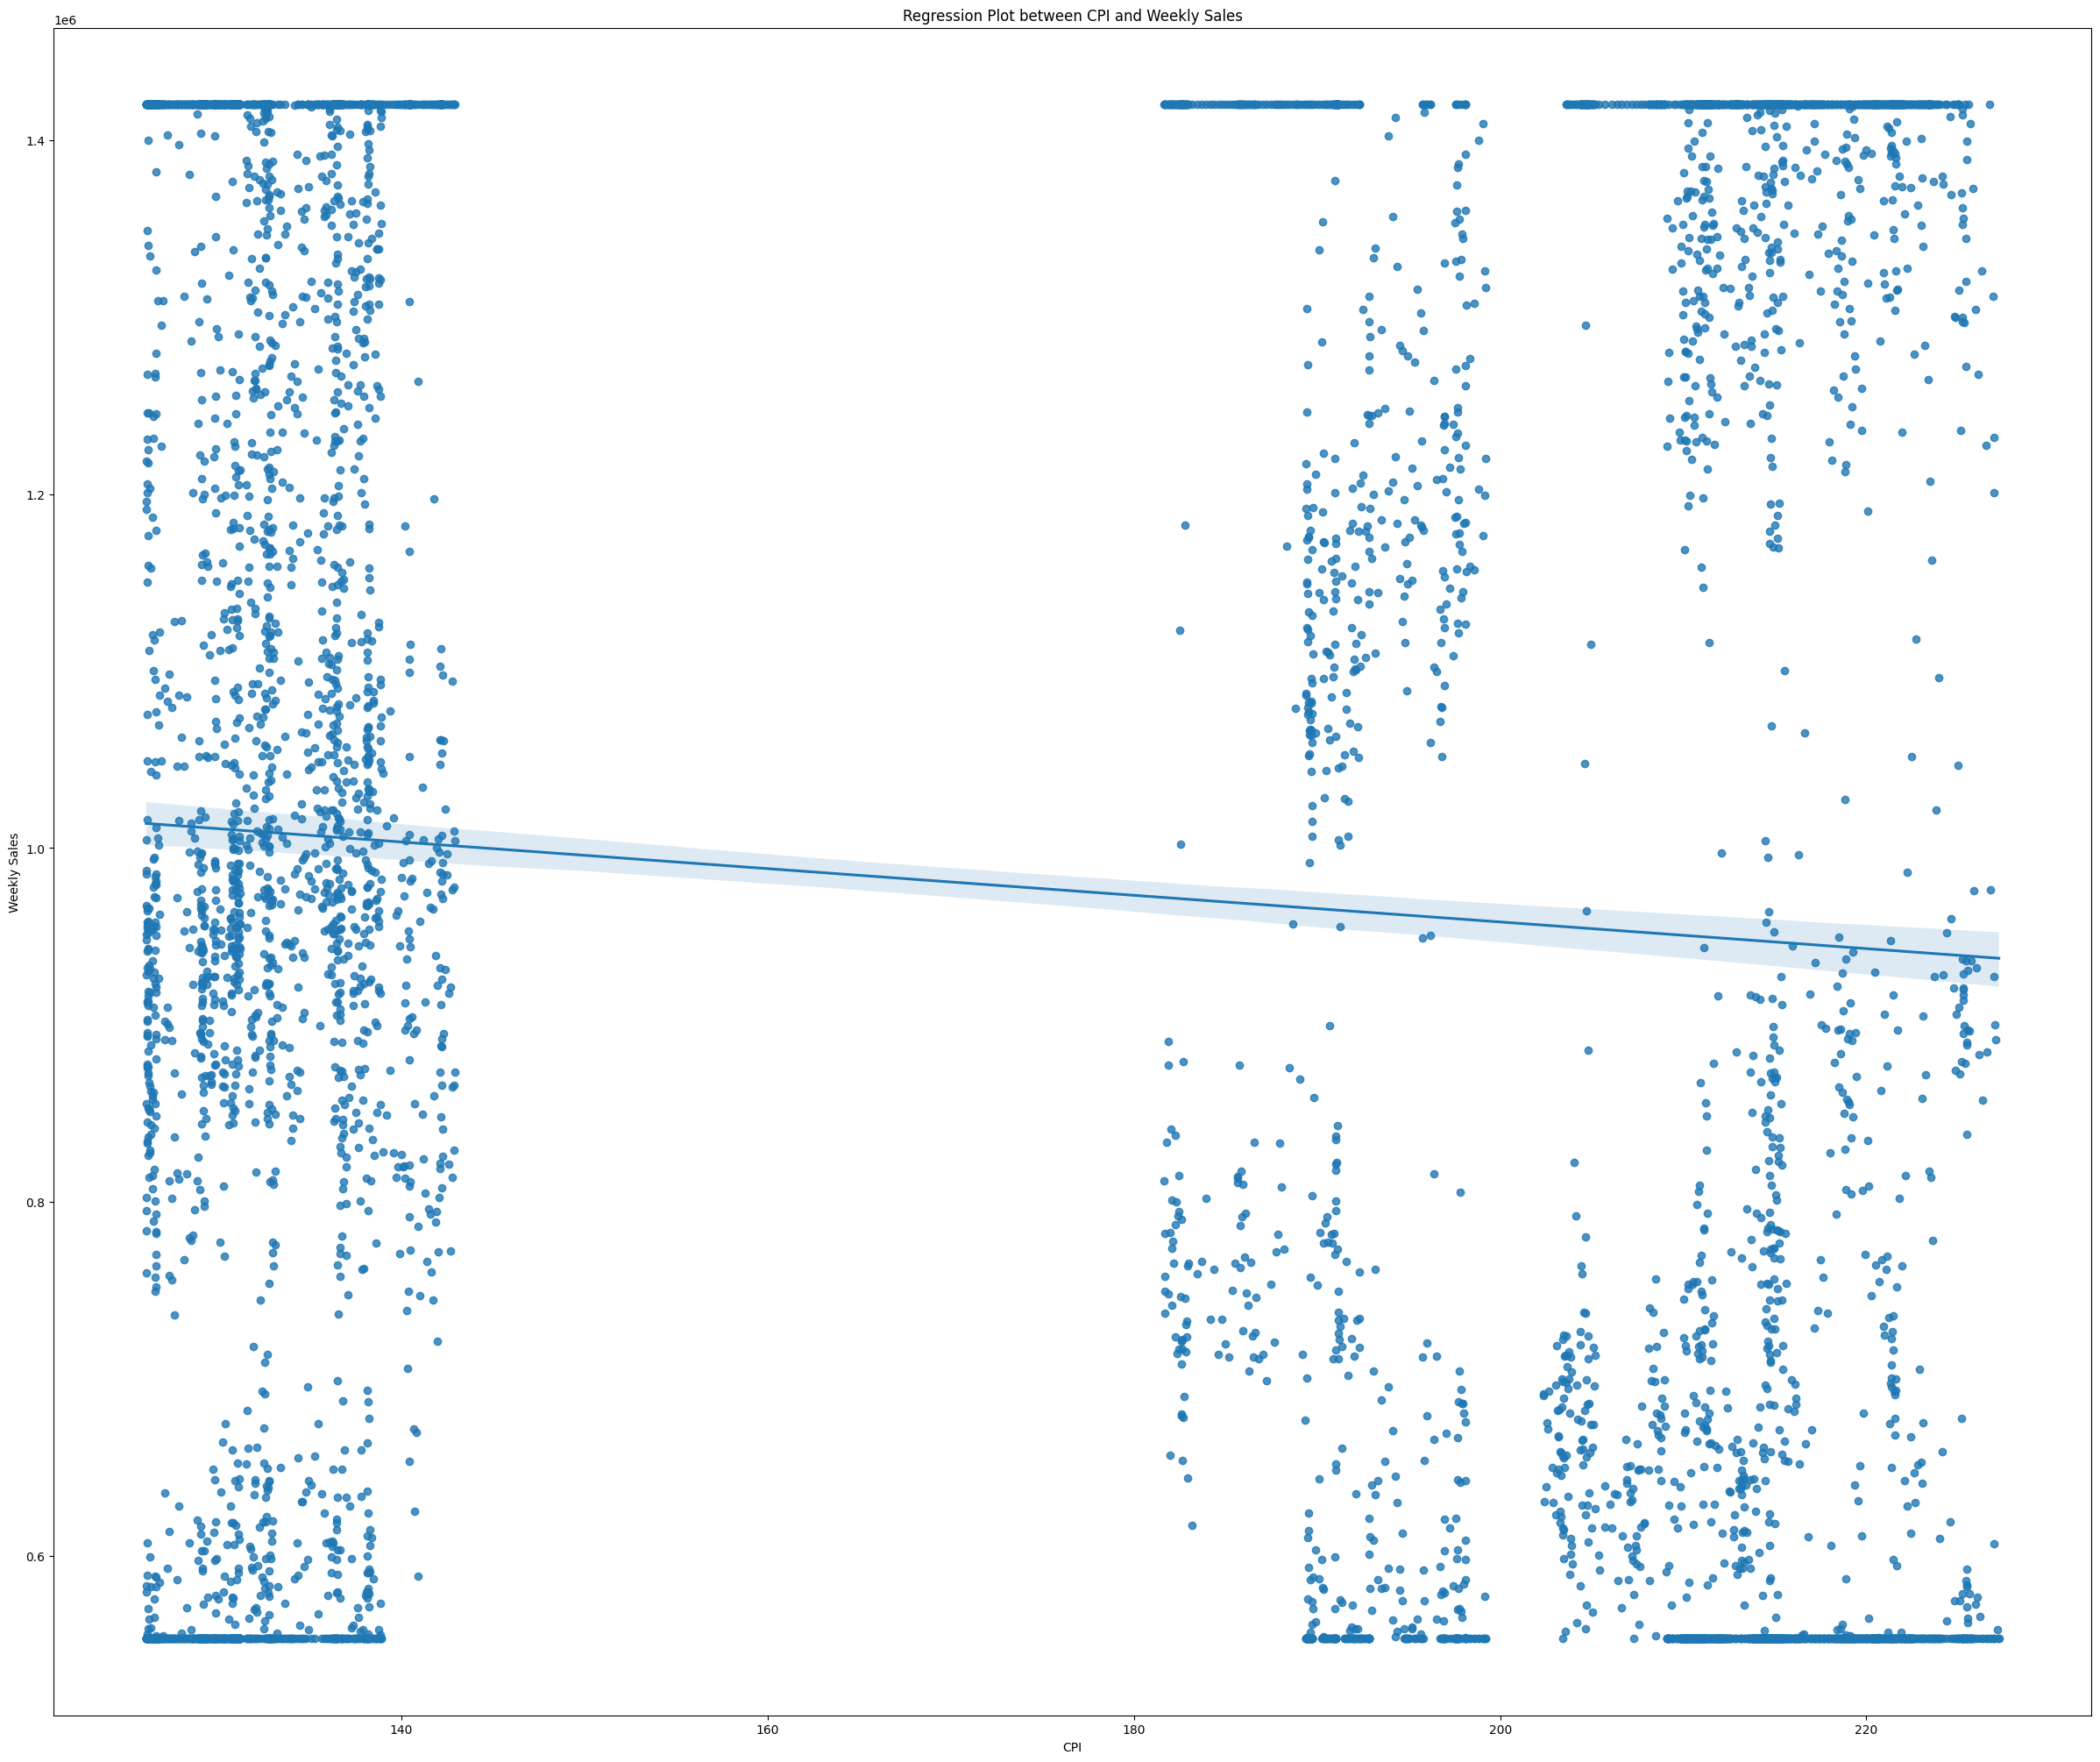

In [48]:
plt.figure(figsize=(30, 25))
sns.regplot(x=df['CPI'], y=df['Weekly_Sales'], data=df)
plt.title('Regression Plot between CPI and Weekly Sales')
plt.xlabel('CPI')
plt.ylabel('Weekly Sales')
plt.show()

### CPI vs Holiday Flags

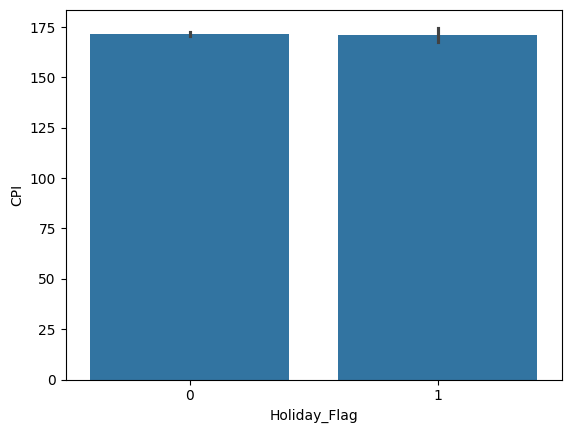

In [49]:
sns.barplot(data=df, x=df['Holiday_Flag'], y=df['CPI'])
plt.show()

### CPI vs Temperature

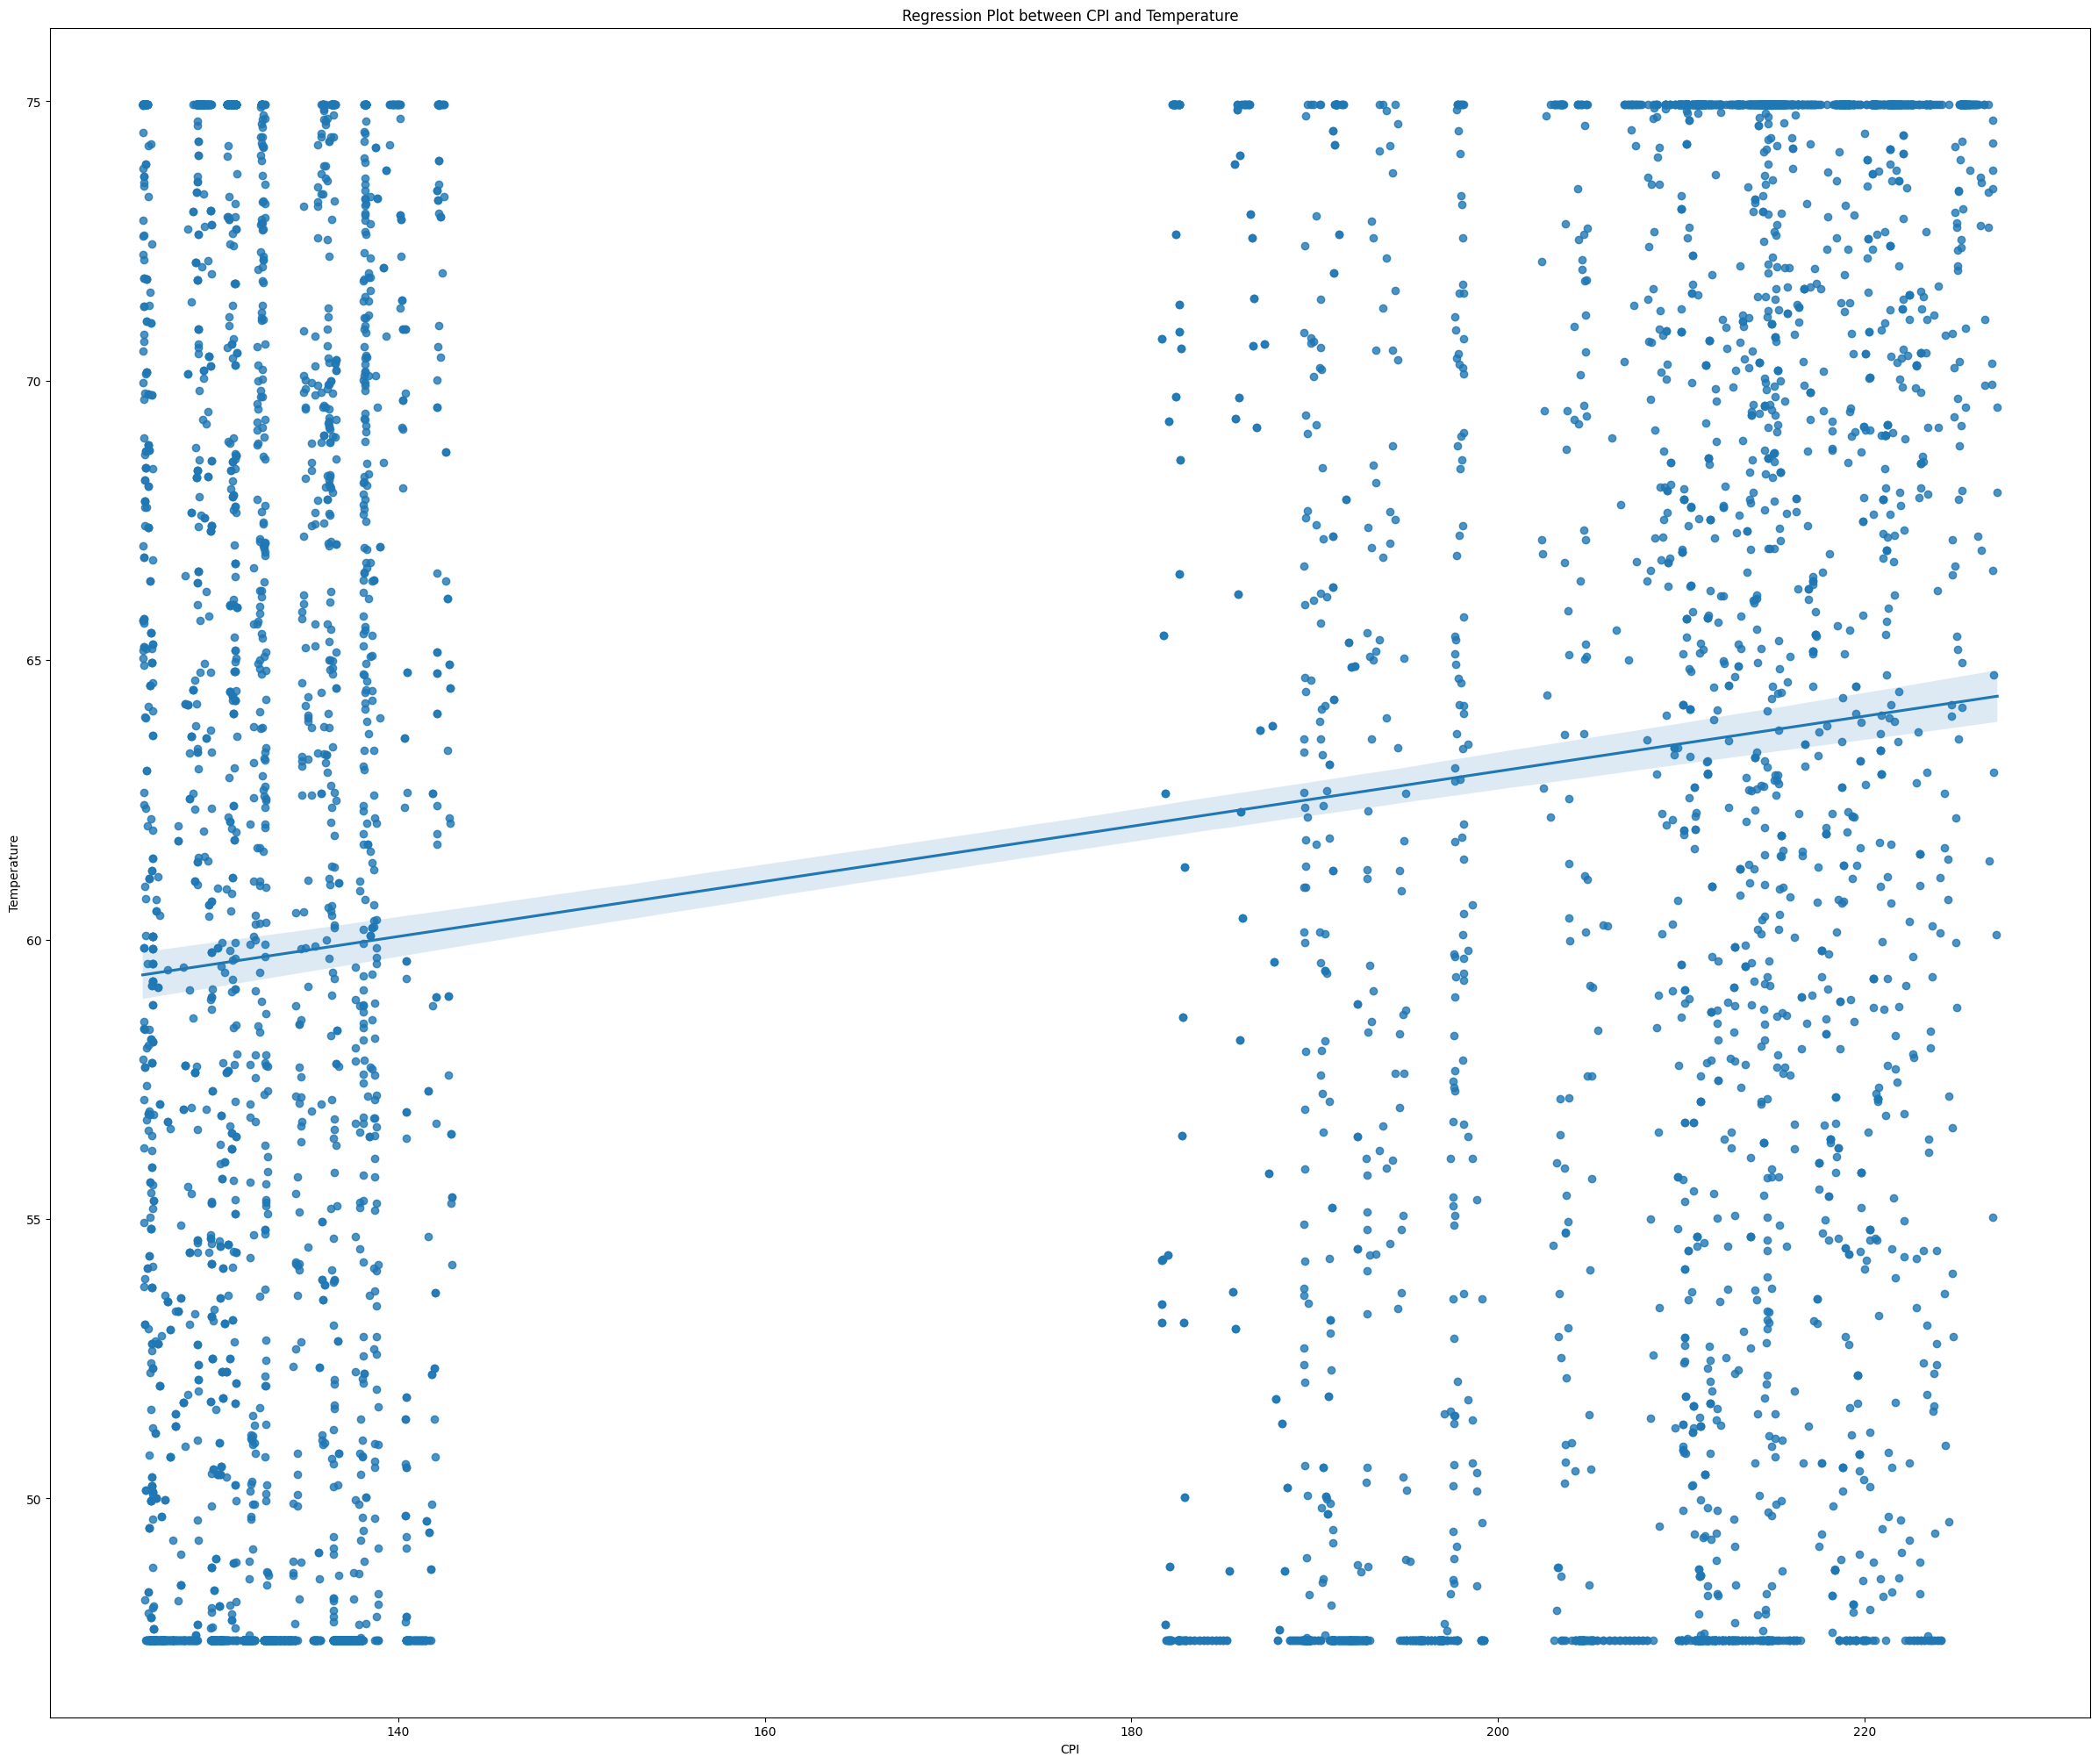

In [50]:
plt.figure(figsize=(30, 25))
sns.regplot(x=df['CPI'], y=df['Temperature'], data=df)
plt.title('Regression Plot between CPI and Temperature')
plt.xlabel('CPI')
plt.ylabel('Temperature')
plt.show()

## Feature Engineering

In [52]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df['DayOfWeek'] = df['Date'].dt.dayofweek  # Monday: 0, Sunday: 6
df['Month'] = df['Date'].dt.month
df['Season'] = df['Date'].dt.quarter
df['Year'] = df['Date'].dt.year
print(df)


      Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0         1 2010-02-05    1420158.66             0        47.46       2.572   
1         1 2010-02-12    1420158.66             1        47.46       2.548   
2         1 2010-02-19    1420158.66             0        47.46       2.514   
3         1 2010-02-26    1409727.59             0        47.46       2.561   
4         1 2010-03-05    1420158.66             0        47.46       2.625   
...     ...        ...           ...           ...          ...         ...   
6430     45 2012-09-28     713173.95             0        64.88       3.997   
6431     45 2012-10-05     733455.07             0        64.89       3.985   
6432     45 2012-10-12     734464.36             0        54.47       4.000   
6433     45 2012-10-19     718125.53             0        56.47       3.969   
6434     45 2012-10-26     760281.43             0        58.85       3.882   

             CPI  Unemployment  DayOfWeek  Month  S

In [53]:
df['Weekly_Sales_Lag1'] = df['Weekly_Sales'].shift(1)  # Lag 1 week
df['Weekly_Sales_Lag2'] = df['Weekly_Sales'].shift(2)  # Lag 2 weeks
df['Weekly_Sales_Lag4'] = df['Weekly_Sales'].shift(4)  # Lag 4 weeks
print(df.head())

   Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1 2010-02-05    1420158.66             0        47.46       2.572   
1      1 2010-02-12    1420158.66             1        47.46       2.548   
2      1 2010-02-19    1420158.66             0        47.46       2.514   
3      1 2010-02-26    1409727.59             0        47.46       2.561   
4      1 2010-03-05    1420158.66             0        47.46       2.625   

          CPI  Unemployment  DayOfWeek  Month  Season  Year  \
0  211.096358         8.106          4      2       1  2010   
1  211.242170         8.106          4      2       1  2010   
2  211.289143         8.106          4      2       1  2010   
3  211.319643         8.106          4      2       1  2010   
4  211.350143         8.106          4      3       1  2010   

   Weekly_Sales_Lag1  Weekly_Sales_Lag2  Weekly_Sales_Lag4  
0                NaN                NaN                NaN  
1         1420158.66                NaN   

### Catering NaN values

In [54]:
for column in df.columns:
    mode_val = df[column].mode()[0]  # mode()[0] gives the first mode value
    df[column].fillna(mode_val, inplace=True)

Rolling averages (moving averages) of sales over a window of time

In [57]:
df['Rolling_Mean_4weeks'] = df['Weekly_Sales'].rolling(window=4).mean()
print(df.head())

   Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1 2010-02-05    1420158.66             0        47.46       2.572   
1      1 2010-02-12    1420158.66             1        47.46       2.548   
2      1 2010-02-19    1420158.66             0        47.46       2.514   
3      1 2010-02-26    1409727.59             0        47.46       2.561   
4      1 2010-03-05    1420158.66             0        47.46       2.625   

          CPI  Unemployment  DayOfWeek  Month  Season  Year  \
0  211.096358         8.106          4      2       1  2010   
1  211.242170         8.106          4      2       1  2010   
2  211.289143         8.106          4      2       1  2010   
3  211.319643         8.106          4      2       1  2010   
4  211.350143         8.106          4      3       1  2010   

   Weekly_Sales_Lag1  Weekly_Sales_Lag2  Weekly_Sales_Lag4  \
0         553350.105         553350.105         553350.105   
1        1420158.660         553350.105 

In [58]:
for column in df.columns:
    mode_val = df[column].mode()[0]  
    df[column].fillna(mode_val, inplace=True)
    
df

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0         1 2010-02-05    1420158.66             0        47.46       2.572   
1         1 2010-02-12    1420158.66             1        47.46       2.548   
2         1 2010-02-19    1420158.66             0        47.46       2.514   
3         1 2010-02-26    1409727.59             0        47.46       2.561   
4         1 2010-03-05    1420158.66             0        47.46       2.625   
...     ...        ...           ...           ...          ...         ...   
6430     45 2012-09-28     713173.95             0        64.88       3.997   
6431     45 2012-10-05     733455.07             0        64.89       3.985   
6432     45 2012-10-12     734464.36             0        54.47       4.000   
6433     45 2012-10-19     718125.53             0        56.47       3.969   
6434     45 2012-10-26     760281.43             0        58.85       3.882   

             CPI  Unemployment  DayOfWeek  Month  Season  Year  \
0     211.096358         8.106          4      2       1  2010   
1     211.242170         8.106          4      2       1  2010   
2     211.289143         8.106          4      2       1  2010   
3     211.319643         8.106          4      2       1  2010   
4     211.350143         8.106          4      3       1  2010   
...          ...           ...        ...    ...     ...   ...   
6430  192.013558         8.622          4      9       3  2012   
6431  192.170412         8.622          4     10       4  2012   
6432  192.327265         8.622          4     10       4  2012   
6433  192.330854         8.622          4     10       4  2012   
6434  192.308899         8.622          4     10       4  2012   

      Weekly_Sales_Lag1  Weekly_Sales_Lag2  Weekly_Sales_Lag4  \
0            553350.105         553350.105         553350.105   
1           1420158.660         553350.105         553350.105   
2           1420158.660        1420158.660         553350.105   
3           1420158.660        1420158.660         553350.105   
4           1409727.590        1420158.660        1420158.660   
...                 ...                ...                ...   
6430         723086.200         702238.270         734297.870   
6431         713173.950         723086.200         766512.660   
6432         733455.070         713173.950         702238.270   
6433         734464.360         733455.070         723086.200   
6434         718125.530         734464.360         713173.950   

      Rolling_Mean_4weeks  
0            5.533501e+05  
1            5.533501e+05  
2            5.533501e+05  
3            1.417551e+06  
4            1.417551e+06  
...                   ...  
6430         7.262528e+05  
6431         7.179884e+05  
6432         7.260449e+05  
6433         7.248047e+05  
6434         7.365816e+05  

[6435 rows x 16 columns]

### Feature Selection Technique

Feature engineering is crucial for improving model performance by creating meaningful features and selecting the most relevant ones. This roadmap guides you through creating new features based on time, lag, and rolling statistics, and then selecting the most important features using feature selection techniques. Adjust the specific implementations based on your dataset and modeling requirements

In [59]:
from sklearn.feature_selection import SelectKBest, f_regression
# Separate features and target variable
X = df.drop(['Date', 'Weekly_Sales'], axis=1)  # Drop 'Date' column as it's no longer needed
y = df['Weekly_Sales']
# Use SelectKBest to select top k features based on correlation with target variable
selector = SelectKBest(score_func=f_regression, k='all')
selector.fit(X, y)
# Get the scores and feature names
feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': selector.scores_})
feature_scores = feature_scores.sort_values(by='Score', ascending=False)
print(feature_scores) #feature scores
top_k_features = feature_scores['Feature'][:5].tolist()  # selecting top 5 features
# Filter dataframe to keep only the selected features
X_selected = X[top_k_features]
# Selected Features
print(X_selected.head())



                Feature          Score
13  Rolling_Mean_4weeks  157824.815319
10    Weekly_Sales_Lag1   96297.049735
11    Weekly_Sales_Lag2   66471.898926
12    Weekly_Sales_Lag4   45986.998963
0                 Store     556.816771
4                   CPI      44.958380
7                 Month      15.686717
5          Unemployment      14.436690
8                Season      11.145860
2           Temperature       6.512403
3            Fuel_Price       4.257035
1          Holiday_Flag       3.043688
9                  Year       0.350970
6             DayOfWeek       0.000000
   Rolling_Mean_4weeks  Weekly_Sales_Lag1  Weekly_Sales_Lag2  \
0         5.533501e+05         553350.105         553350.105   
1         5.533501e+05        1420158.660         553350.105   
2         5.533501e+05        1420158.660        1420158.660   
3         1.417551e+06        1420158.660        1420158.660   
4         1.417551e+06        1409727.590        1420158.660   

   Weekly_Sales_Lag4  Store  


### Training and Testing

### Splitting the dataset randomly to achieve test dataset

In [68]:
import pandas as pd
from sklearn.model_selection import train_test_split
df = pd.read_csv('Walmart.csv')
# Separate features (X) and target variable (y)
X = df.drop(['Date', 'Weekly_Sales'], axis=1)  
y = df['Weekly_Sales']
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
test_dataset = X_test.copy()
test_dataset['Weekly_Sales'] = y_test
print(test_dataset)
test_dataset.to_csv('test_dataset.csv', index=False)

      Store  Holiday_Flag  Temperature  Fuel_Price         CPI  Unemployment  \
2436     18             0        42.39       2.805  131.784000         9.202   
3361     24             0        68.88       3.964  135.265267         8.212   
233       2             0        65.87       3.372  217.325182         7.441   
3667     26             0        40.08       3.570  136.461806         7.598   
5011     36             0        59.56       2.701  209.980321         8.554   
...     ...           ...          ...         ...         ...           ...   
2600     19             0        74.20       2.942  132.614193         8.099   
6308     45             0        69.27       2.899  182.046418         8.899   
6292     45             0        27.31       2.784  181.871190         8.992   
151       2             0        63.27       2.719  210.479887         8.200   
2344     17             0        24.21       3.230  128.264750         6.866   

      Weekly_Sales  
2436    1138800.32

### 2. Model Selection

### a. Linear Regression

In [69]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred_lr = linear_reg.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression - Mean Squared Error: {mse_lr}")
print(f"Linear Regression - R^2 Score: {r2_lr}")


Linear Regression - Mean Squared Error: 274455221280.66055
Linear Regression - R^2 Score: 0.1480635340595079


In [64]:
import joblib
final_model = linear_reg
# Save the trained Linear Regression model to a file
model_filename = 'linear_regression_model.pkl'
joblib.dump(final_model, model_filename)
print(f"Trained Linear Regression model saved as {model_filename}")


Trained Linear Regression model saved as linear_regression_model.pkl


### Preparing Test Dataset

In [73]:
X_test

Store  Holiday_Flag  Temperature  Fuel_Price         CPI  Unemployment
2436     18             0        42.39       2.805  131.784000         9.202
3361     24             0        68.88       3.964  135.265267         8.212
233       2             0        65.87       3.372  217.325182         7.441
3667     26             0        40.08       3.570  136.461806         7.598
5011     36             0        59.56       2.701  209.980321         8.554
...     ...           ...          ...         ...         ...           ...
2600     19             0        74.20       2.942  132.614193         8.099
6308     45             0        69.27       2.899  182.046418         8.899
6292     45             0        27.31       2.784  181.871190         8.992
151       2             0        63.27       2.719  210.479887         8.200
2344     17             0        24.21       3.230  128.264750         6.866

[1287 rows x 6 columns]

## Final Prediction

In [74]:
def predict_sales(input_data):
    # Load the saved Linear Regression model
    loaded_model = joblib.load(model_filename)
    # Make predictions
    predictions = loaded_model.predict(input_data)
    return predictions

# Extract the features from the test dataset
test_features = X_test.copy()
# Use the predict_sales function to make predictions on the test features
predicted_sales = predict_sales(test_features)
print('Following are the predictions of Weekly Sales made on Test Data')
for i in predicted_sales:
    print(i)

Following are the predictions of Weekly Sales made on Test Data
1196174.8001884264
1096306.7602731262
1261762.9926610305
1102194.4287541036
746743.2349312308
924797.9050749489
904234.1502346629
1206798.6990020007
1012720.9489607648
1207518.7236071883
1215839.968849156
1176779.45218089
1309259.1467946325
1224192.7232538888
942723.0084449323
1093617.5095530758
1240804.6743386418
920760.7829544963
899286.444910123
1256251.071976174
675000.4108329678
814353.0281069495
1467152.9609307924
964891.9035446923
1195079.8669388252
1462755.275960037
1143529.869087533
1321835.441487425
830414.8063985333
1063710.4802715736
949680.7944935756
1110586.3640906166
1073981.5748801734
816388.1426477209
1199484.7150130104
990981.108692006
1024860.507324148
1255566.5087012416
1526004.4582953248
1254974.908727678
920207.9163357732
953609.3746330864
862205.8985856336
1124101.6952242872
1124775.6655348681
1099792.5944922916
1352191.0295237862
1287988.7264243052
1258522.561680546
814024.9387253532
1305437.5977118

Trained Linear Regression model saved as linear_regression_model.pkl


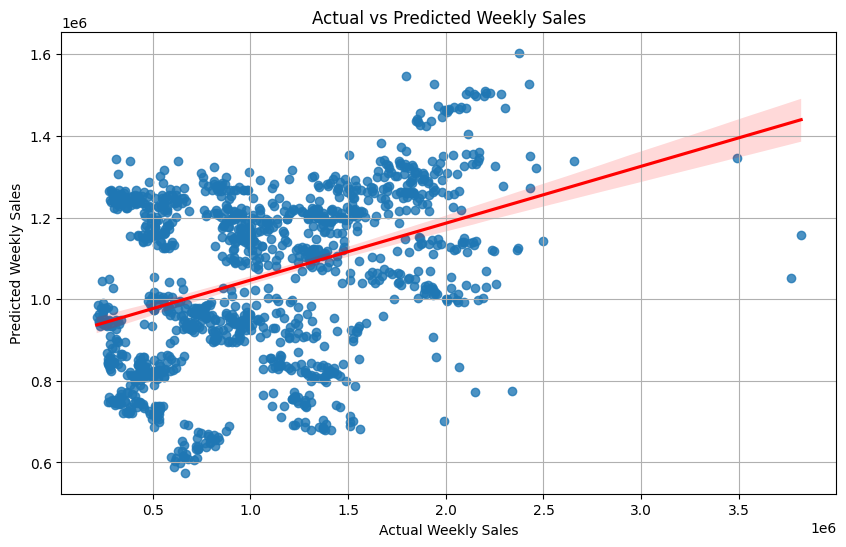

In [77]:
import pandas as pd
from sklearn.model_selection import train_test_split
import joblib
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset (replace 'Walmart.csv' with your actual dataset path)
df = pd.read_csv('Walmart.csv')

# Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Separate features (X) and target variable (y)
X = df.drop(['Weekly_Sales'], axis=1)  # Keep 'Date' and other details
y = df['Weekly_Sales']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Linear Regression model
linear_reg = LinearRegression()

# Fit the model on training data
linear_reg.fit(X_train.drop(['Date'], axis=1), y_train)  # Drop 'Date' for training

# Save the trained Linear Regression model to a file
model_filename = 'linear_regression_model.pkl'
joblib.dump(linear_reg, model_filename)

print(f"Trained Linear Regression model saved as {model_filename}")

# Define the predict_sales function
def predict_sales(input_data):
    # Load the saved Linear Regression model
    loaded_model = joblib.load(model_filename)
    
    # Make predictions
    predictions = loaded_model.predict(input_data)
    
    return predictions

# Extract the features from the test dataset
test_features = X_test.drop(['Date'], axis=1)  # Drop 'Date' for prediction

# Use the predict_sales function to make predictions on the test features
predicted_sales = predict_sales(test_features)

# Combine the predictions with the original test dataset details
results_df = X_test.copy()
results_df['Weekly_Sales'] = y_test
results_df['Predicted_Sales'] = predicted_sales

# # Print the results DataFrame
# print(results_df)

# Optionally, save the results DataFrame to a CSV file
# results_df.to_csv('predicted_test_data.csv', index=False)

# Plot the regression plot of actual vs predicted sales
plt.figure(figsize=(10, 6))
sns.regplot(x='Weekly_Sales', y='Predicted_Sales', data=results_df, line_kws={'color': 'red'})
plt.title('Actual vs Predicted Weekly Sales')
plt.xlabel('Actual Weekly Sales')
plt.ylabel('Predicted Weekly Sales')
plt.grid(True)
plt.show()
